In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix





In [ ]:
df=pd.read_csv('D:/work/study/ML/DS_class/Clothing_Store.csv')

In [ ]:

df.describe()


HHKEY      ZIP_CODE           REC           FRE           MON  \
count  2.174000e+04  21740.000000  21740.000000  21740.000000  21740.000000   
mean   9.955672e+12  48935.216007    126.966329      5.064213    472.888236   
std    5.195910e+08  24086.448839    104.737712      6.420276    640.050799   
min    9.955600e+12      0.000000      1.000000      1.000000      0.990000   
25%    9.955616e+12  30339.000000     35.000000      1.000000    135.605000   
50%    9.955628e+12  48335.000000     98.000000      3.000000    263.490000   
75%    9.955639e+12  66707.000000    206.000000      6.000000    569.000000   
max    9.964401e+12  99687.000000    365.000000    115.000000  22511.490000   

            CC_CARD          AVRG     PC_CALC20     PSWEATERS    PKNIT_TOPS  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean       0.383763    113.889105     12.571803      0.213665      0.027163   
std        0.486312     87.249794      2.461413      0.230224      0.068648   
min        0.000000      0.490000     11.000000      0.000000      0.000000   
25%        0.000000     60.990000     11.000000      0.000000      0.000000   
50%        0.000000     92.070000     11.000000      0.160000      0.000000   
75%        1.000000    139.505000     16.000000      0.310000      0.030000   
max        1.000000   1919.880000     19.000000      1.000000      1.000000   

       ...     STORELOY           WEB        MAILED     RESPONDED  \
count  ...  21740.00000  21740.000000  21740.000000  21740.000000   
mean   ...   2116.28988      0.041536      4.672723      1.193606   
std    ...   1806.10523      0.199532      3.547191      1.828949   
min    ...      3.00000      0.000000      0.000000      0.000000   
25%    ...    337.00000      0.000000      1.000000      0.000000   
50%    ...   1670.00000      0.000000      4.000000      0.000000   
75%    ...   4176.00000      0.000000      8.000000      2.000000   
max    ...   7504.00000      1.000000     11.000000     11.000000   

       RESPONSERATE            HI      LTFREDAY      CLUSTYPE       PERCRET  \
count  21740.000000  21740.000000  21740.000000  21740.000000  21740.000000   
mean      17.276674     37.888989     80.240028     15.106670      0.130584   
std       24.543108     28.149856     78.730265     12.214348      0.556766   
min        0.000000      0.050000      0.090000      0.000000      0.000000   
25%        0.000000     18.410000     24.957500      5.000000      0.000000   
50%        0.000000     29.520000     52.000000     11.000000      0.000000   
75%       30.000000     50.000000    107.000000     22.000000      0.090000   
max      100.000000    200.000000    364.000000     50.000000     40.920000   

               RESP  
count  21740.000000  
mean       0.166099  
std        0.372178  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 50 columns]

In [1]:
df.isnull().any()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 51 columns):
HHKEY           21740 non-null int64
ZIP_CODE        21740 non-null int64
REC             21740 non-null int64
FRE             21740 non-null int64
MON             21740 non-null float64
CC_CARD         21740 non-null int64
AVRG            21740 non-null float64
PC_CALC20       21740 non-null int64
PSWEATERS       21740 non-null float64
PKNIT_TOPS      21740 non-null float64
PKNIT_DRES      21740 non-null float64
PBLOUSES        21740 non-null float64
PJACKETS        21740 non-null float64
PCAR_PNTS       21740 non-null float64
PCAS_PNTS       21740 non-null float64
PSHIRTS         21740 non-null float64
PDRESSES        21740 non-null float64
PSUITS          21740 non-null float64
POUTERWEAR      21740 non-null float64
PJEWELRY        21740 non-null float64
PFASHION        21740 non-null float64
PLEGWEAR        21740 non-null float64
PCOLLSPND       21740 non-null float64
AMSPEN

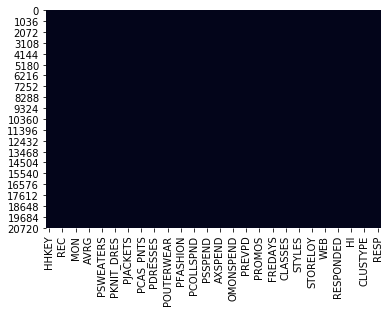

In [ ]:
# heatmap to show missing value  
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
df=df.rename(columns={"HHKEY":"Customer_id","CC_CARD":"Creditcard_user","VALPHON":"Valid_phone_number","WEB":"is_Web_shopper"
                  ,"RESP":"is_Response","PSWEATERS":"Sweater","PKNIT_DRES":"Knit_drees","PBLOUSES":"Blouses","PJACKETS":
                  "Jackets","PCAR_PNTS":"Career_pants","PSHIRTS":"Shirts","PDRESSES":"Dresses","PSUITS":"Suits","POUTERWEAR"
                  :"Outer_wear","PJEWELRY":"Jewelery","PFASHION":"Fashion","PLEGWEAR":"Legwear","PCOLLSPND":"Collectibles","PCAS_PNTS":
                  "Casual_pants","CLUSTYPE":"Cluster_type","GMP":"Gross_margin_perc","MARKDOWN":"Markdown_perc","OMONSPEND":"1_month_spend"
                  ,"TMONSPEND":"3_month_spend","SMONSPEND":"6_month_spend","AMSPEND":"Am_spend","PSSPEND":"Ps_spend","CCSPEND":"Cc_spend"
                  ,"AXSPEND":"Ax_spend","MON":"Total_net_sale","FRE":"Visits","PC_CALC20":"Band","HI":"Product_unif","PROMOS":"Promotions"
                  })

In [ ]:
df=df.rename(columns={"PKNIT_TOPS":"Knit_tops","":"Fashion","AVRG":"avg_amountspend_visit","PREVPD":"Lastyear_spend","LTFREDAY":
                     "Lifetime_avg_visit","PERCRET":"perc_return","MAILED":"is_Mailed","DAYS":"Days_onfile","FREDAYS":"Days_btn_purchase"})

In [ ]:

df.columns

Index(['Customer_id', 'ZIP_CODE', 'REC', 'Visits', 'Total_net_sale',
       'Creditcard_user', 'avg_amountspend_visit', 'Band', 'Sweater',
       'Knit_tops', 'Knit_drees', 'Blouses', 'Jackets', 'Career_pants',
       'Casual_pants', 'Shirts', 'Dresses', 'Suits', 'Outer_wear', 'Jewelery',
       'Fashion', 'Legwear', 'Collectibles', 'Am_spend', 'Ps_spend',
       'Cc_spend', 'Ax_spend', '3_month_spend', '1_month_spend',
       '6_month_spend', 'Lastyear_spend', 'Gross_margin_perc', 'Promotions',
       'Days_onfile', 'Days_btn_purchase', 'Markdown_perc', 'CLASSES',
       'COUPONS', 'STYLES', 'STORES', 'STORELOY', 'Valid_phone_number',
       'is_Web_shopper', 'is_Mailed', 'RESPONDED', 'RESPONSERATE',
       'Product_unif', 'Lifetime_avg_visit', 'Cluster_type', 'perc_return',
       'is_Response'],
      dtype='object')

In [ ]:
df['is_Response'].value_counts()/21740*100 # Describe the response data, no response 84.4%, 16.8%  is respponse to promotion last year

0    83.390064
1    16.609936
Name: is_Response, dtype: float64

In [ ]:
response_Summary = df.groupby('is_Response')
print(response_Summary.mean())

              Customer_id      ZIP_CODE         REC     Visits  \
is_Response                                                      
0            9.955669e+12  49022.806443  139.355397   3.896299   
1            9.955689e+12  48495.468845   64.767101  10.927721   

             Total_net_sale  Creditcard_user  avg_amountspend_visit  \
is_Response                                                           
0                380.680772         0.331403             116.516259   
1                935.815159         0.646635             100.699499   

                  Band   Sweater  Knit_tops  ...    STORES     STORELOY  \
is_Response                                  ...                          
0            12.469083  0.216763   0.027096  ...  2.122401  2088.646919   
1            13.087510  0.198114   0.027503  ...  3.432844  2255.071171   

             is_Web_shopper  is_Mailed  RESPONDED  RESPONSERATE  Product_unif  \
is_Response                                                         

In [ ]:
response_Summary.std()

Customer_id      ZIP_CODE         REC     Visits  \
is_Response                                                      
0            4.975133e+08  24275.777373  105.630602   4.215490   
1            6.184482e+08  23110.737367   73.410965  10.851071   

             Total_net_sale  Creditcard_user  avg_amountspend_visit      Band  \
is_Response                                                                     
0                451.612880         0.470730              88.955245  2.409401   
1               1088.907501         0.478081              76.791418  2.648281   

              Sweater  Knit_tops  ...    STORES     STORELOY  is_Web_shopper  \
is_Response                       ...                                          
0            0.241196   0.072039  ...  1.339110  1815.415678        0.162973   
1            0.163564   0.048147  ...  2.244505  1752.283736        0.316622   

             is_Mailed  RESPONDED  RESPONSERATE  Product_unif  \
is_Response                                                     
0              3.46915   1.513923     21.665928     28.880914   
1              3.47172   2.481591     29.523568     18.177935   

             Lifetime_avg_visit  Cluster_type  perc_return  
is_Response                                                 
0                     81.367577     12.253588     0.459514  
1                     23.612428     12.013453     0.890431  

[2 rows x 49 columns]

Customer_id  ZIP_CODE       REC    Visits  \
Customer_id               1.000000  0.020608 -0.012639 -0.001092   
ZIP_CODE                  0.020608  1.000000  0.021538 -0.028306   
REC                      -0.012639  0.021538  1.000000 -0.441061   
Visits                   -0.001092 -0.028306 -0.441061  1.000000   
Total_net_sale           -0.004839 -0.030140 -0.359955  0.721471   
Creditcard_user           0.032610 -0.045742 -0.307386  0.361375   
avg_amountspend_visit     0.007562  0.014959  0.154574 -0.185472   
Band                      0.013738 -0.040606 -0.182729  0.163258   
Sweater                  -0.007753 -0.034775  0.117745 -0.045878   
Knit_tops                -0.005783 -0.009862 -0.084123  0.010681   
Knit_drees                0.000532 -0.000200  0.012546 -0.010467   
Blouses                  -0.003488  0.022560 -0.024071 -0.051971   
Jackets                   0.013341 -0.012739  0.033604 -0.038684   
Career_pants             -0.002953  0.001965  0.034341 -0.061963   
Casual_pants             -0.006441 -0.006324 -0.021325 -0.032834   
Shirts                    0.001672  0.000186 -0.000669 -0.034957   
Dresses                   0.008301  0.006981 -0.080201 -0.055057   
Suits                    -0.002523  0.022909  0.061320 -0.054425   
Outer_wear               -0.001059  0.021401  0.082258 -0.017011   
Jewelery                  0.003633  0.010914  0.016147 -0.009547   
Fashion                  -0.007097  0.028622 -0.010983 -0.000121   
Legwear                  -0.000172  0.002425 -0.004592 -0.008591   
Collectibles              0.005527  0.018182  0.107019 -0.108055   
Am_spend                 -0.006131 -0.025540 -0.063569  0.128790   
Ps_spend                 -0.003717 -0.042427 -0.239279  0.481066   
Cc_spend                 -0.004297  0.007866 -0.245761  0.504599   
Ax_spend                  0.010233 -0.019127 -0.157299  0.261383   
3_month_spend             0.005347 -0.013668 -0.463109  0.502306   
1_month_spend             0.006922 -0.010634 -0.359199  0.366457   
6_month_spend            -0.000581 -0.029060 -0.465965  0.628750   
Lastyear_spend           -0.012310 -0.019936 -0.088230  0.386845   
Gross_margin_perc        -0.001624  0.011027  0.155893 -0.145310   
Promotions                0.004871 -0.060090 -0.135762  0.468412   
Days_onfile              -0.052800 -0.028512 -0.162808  0.367565   
Days_btn_purchase        -0.035399  0.015922  0.575154 -0.455684   
Markdown_perc             0.006993 -0.010054 -0.221767  0.223029   
CLASSES                   0.007150 -0.018968 -0.521940  0.775304   
COUPONS                  -0.001959 -0.036076 -0.346838  0.678954   
STYLES                   -0.004427 -0.029410 -0.394692  0.847534   
STORES                    0.012935 -0.003384 -0.410825  0.643226   
STORELOY                 -0.003128 -0.050300 -0.085142  0.051918   
is_Web_shopper            0.018850 -0.011400 -0.135741  0.209023   
is_Mailed                 0.004968 -0.007633 -0.141943  0.413684   
RESPONDED                -0.002132 -0.026455 -0.433350  0.758890   
RESPONSERATE              0.003484 -0.032232 -0.470166  0.660670   
Product_unif             -0.011090  0.012836  0.451701 -0.427896   
Lifetime_avg_visit       -0.030987  0.027520  0.660477 -0.431515   
Cluster_type             -0.001661 -0.046024  0.011574 -0.012470   
perc_return               0.002022  0.004865 -0.059665  0.177274   
is_Response               0.014318 -0.008148 -0.265044  0.407606   

                       Total_net_sale  Creditcard_user  avg_amountspend_visit  \
Customer_id                 -0.004839         0.032610               0.007562   
ZIP_CODE                    -0.030140        -0.045742               0.014959   
REC                         -0.359955        -0.307386               0.154574   
Visits                       0.721471         0.361375              -0.185472   
Total_net_sale               1.000000         0.357587               0.227957   
Creditcard_user              0.357587         1.000000              

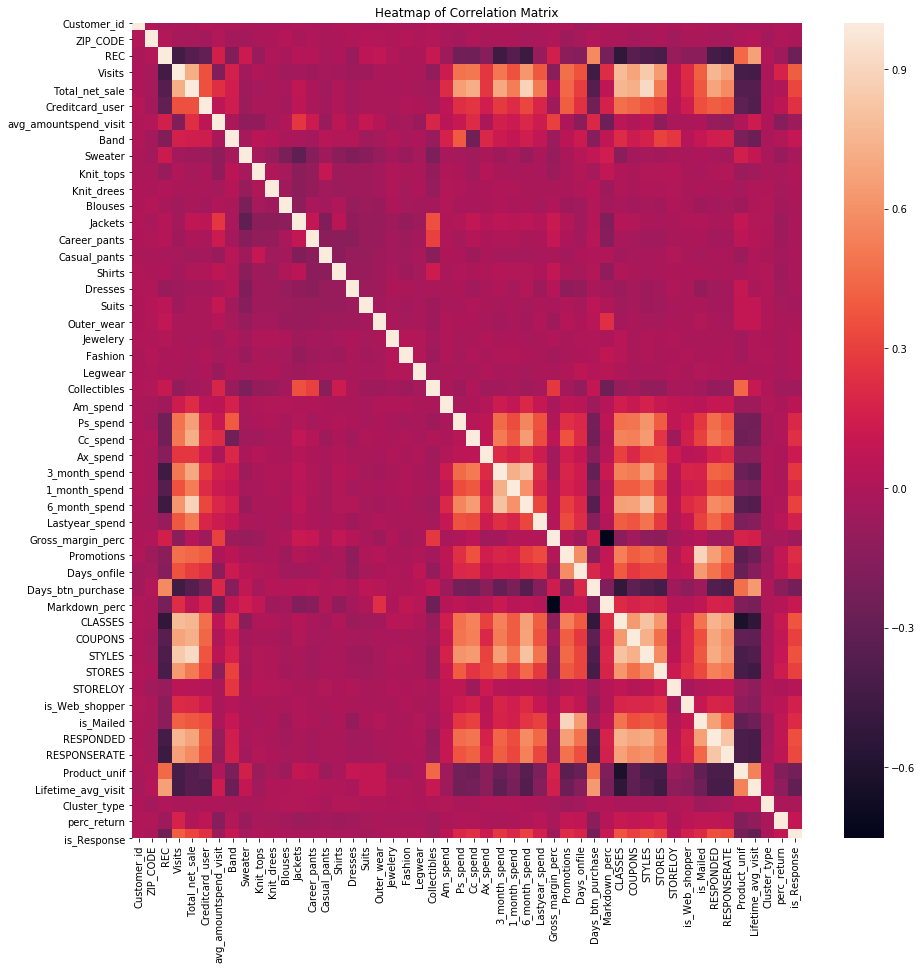

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

# EDA

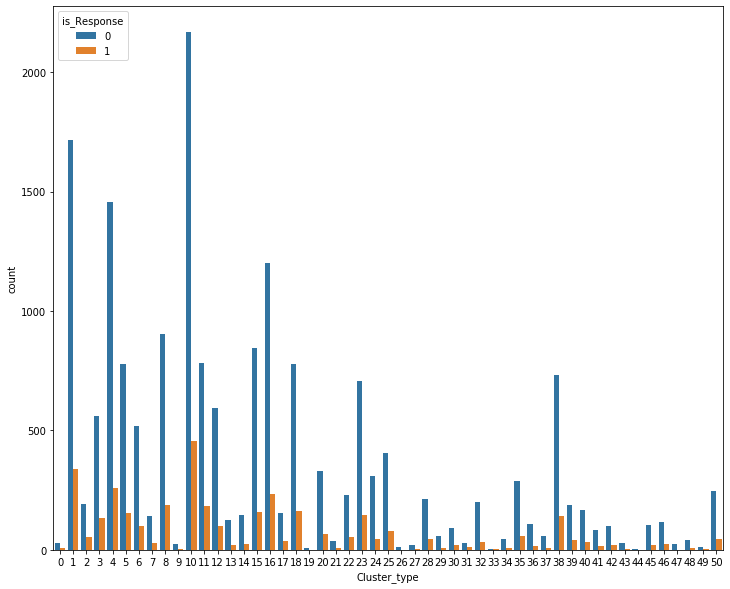

In [ ]:
#count the number of clusters who respond and not respond to promotioms 
f,ax=plt.subplots(figsize=(12,10))
sns.countplot(x='Cluster_type',hue='is_Response',data=df)


In [ ]:
#The 20 most prevalent Microvision lifestyle cluster types.
df.Cluster_type.value_counts()[:20]/21740 *100

10    12.065317
1      9.448022
4      7.907084
16     6.582337
8      5.032199
15     4.609016
11     4.434223
18     4.314627
5      4.282429
38     4.015639
23     3.928243
3      3.196872
12     3.196872
6      2.847286
25     2.230911
20     1.839926
24     1.632935
35     1.586937
50     1.343146
22     1.315547
Name: Cluster_type, dtype: float64

#A Violin Plot is used to visualise the distribution of the data and its probability density.
#This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side,
#to show the distribution shape of the data.

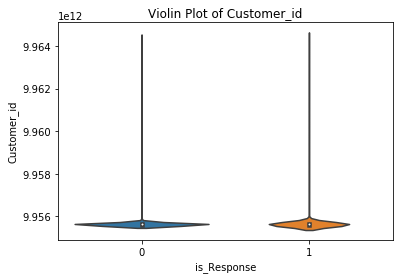

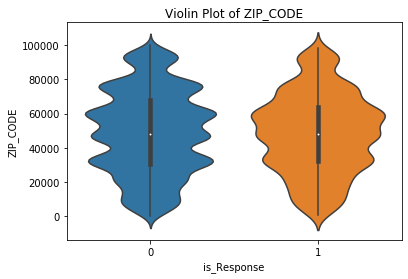

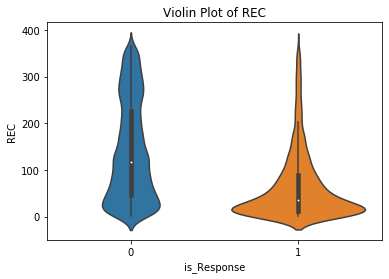

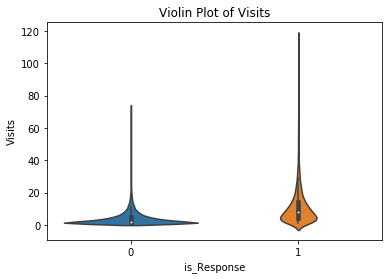

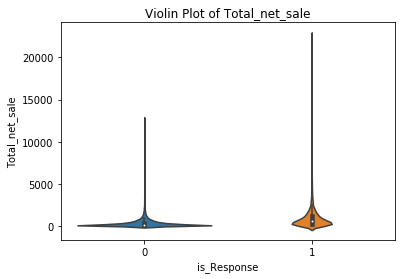

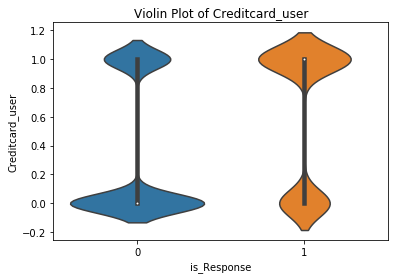

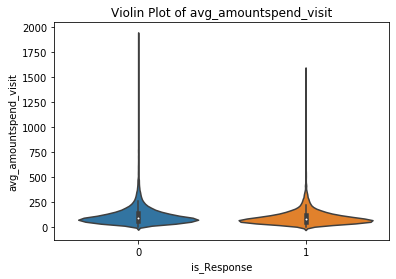

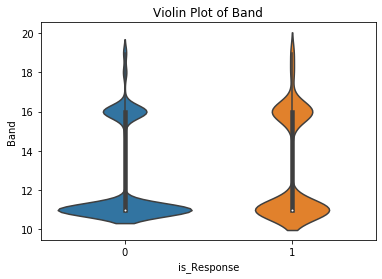

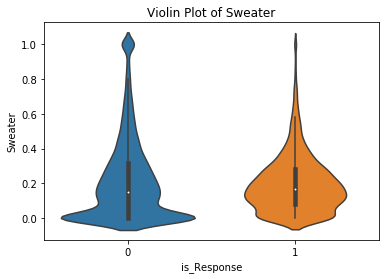

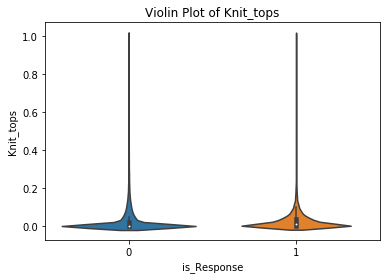

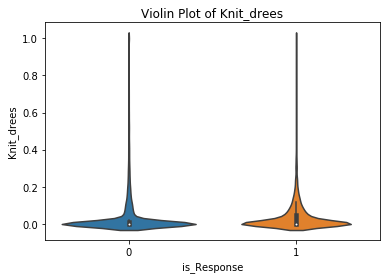

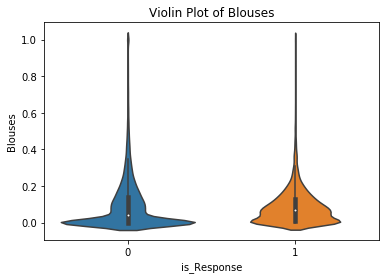

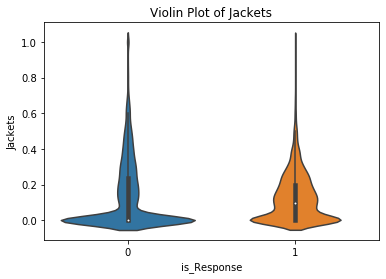

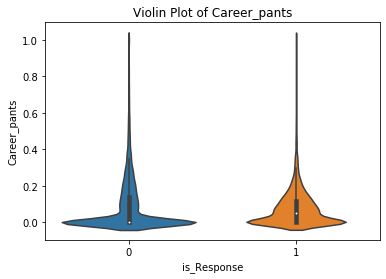

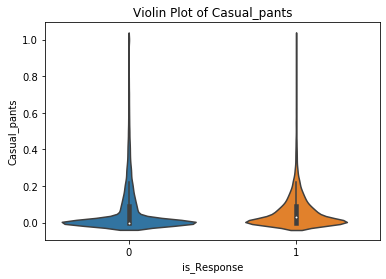

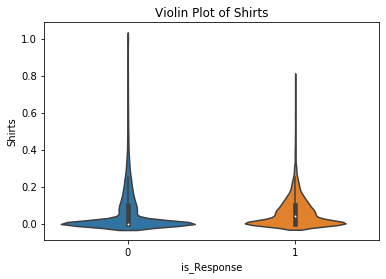

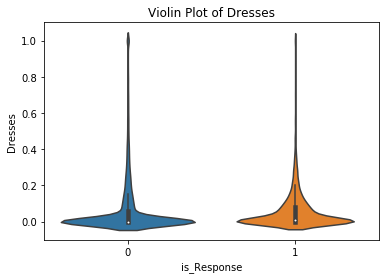

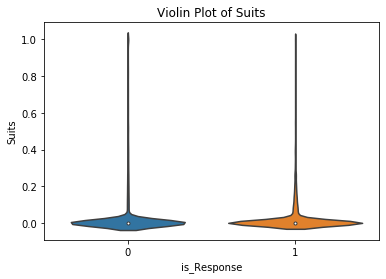

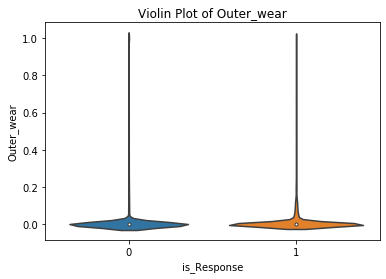

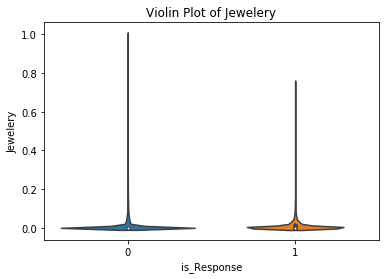

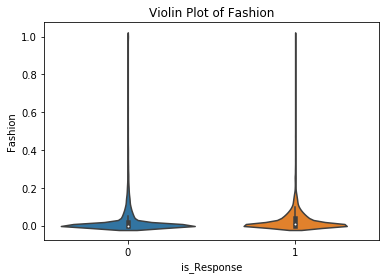

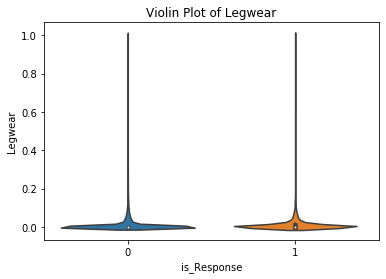

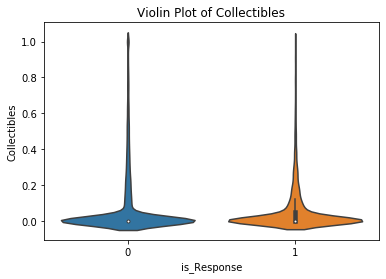

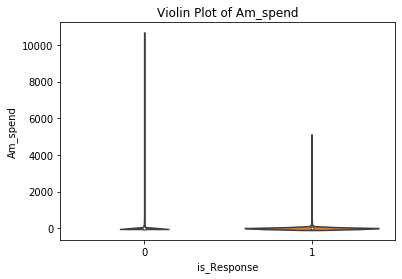

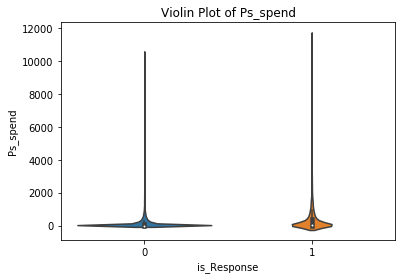

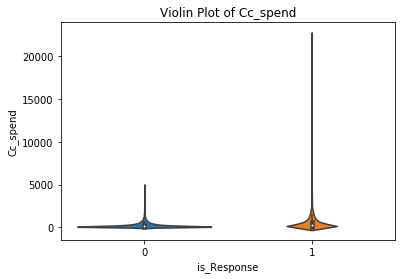

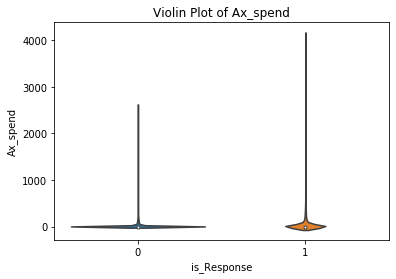

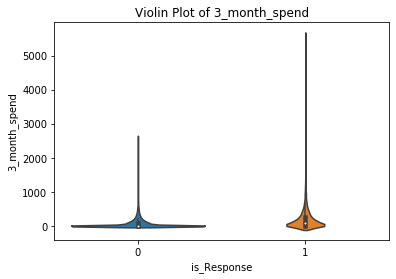

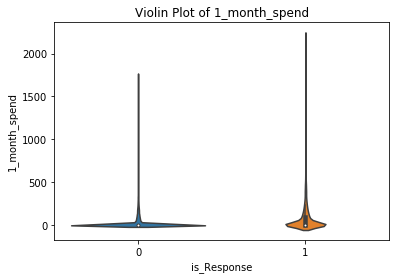

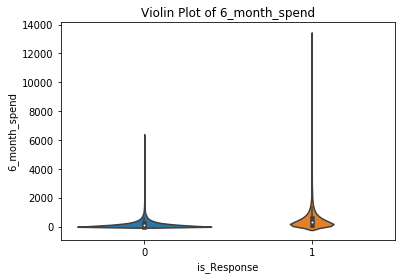

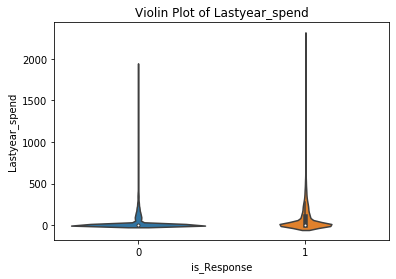

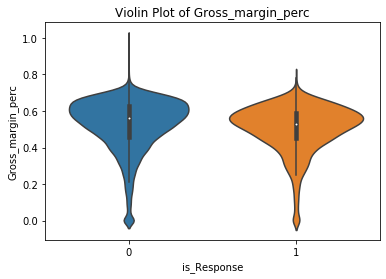

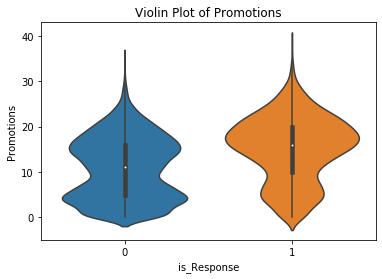

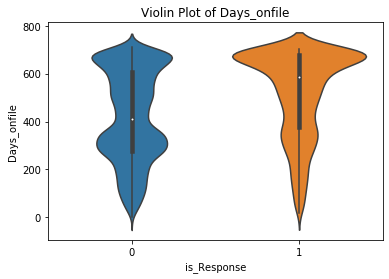

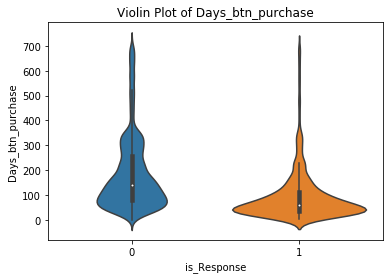

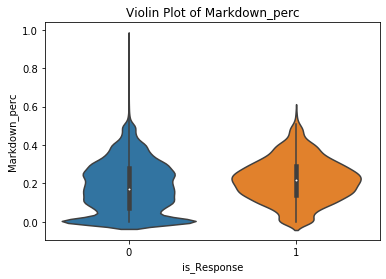

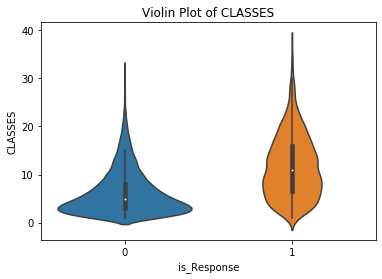

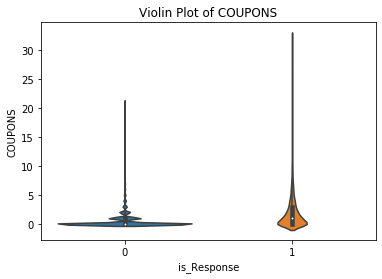

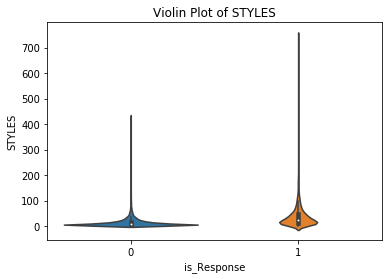

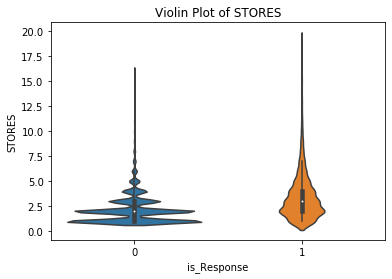

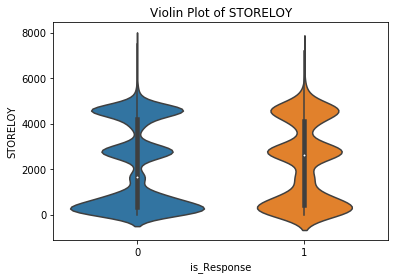

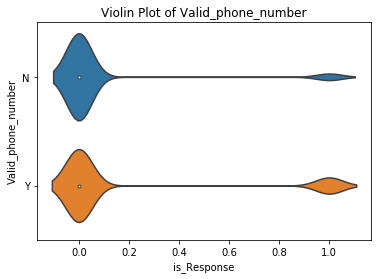

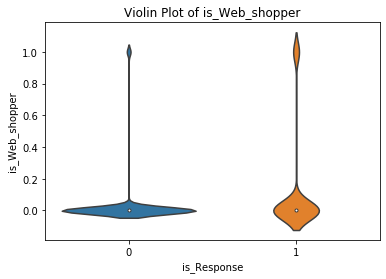

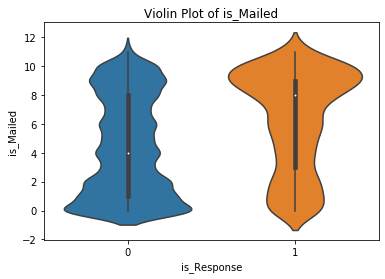

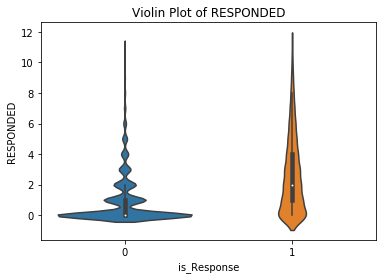

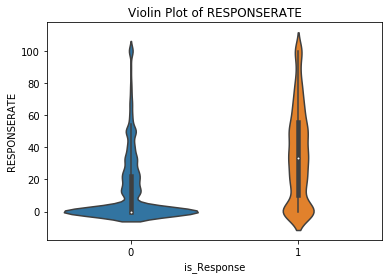

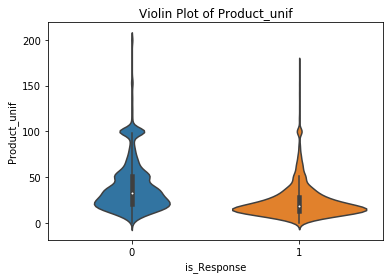

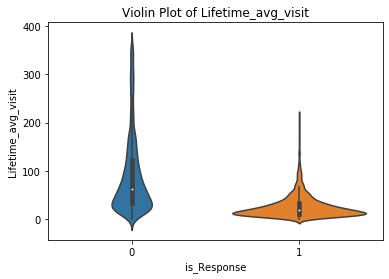

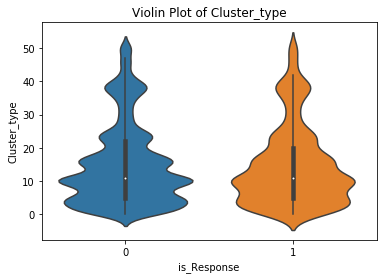

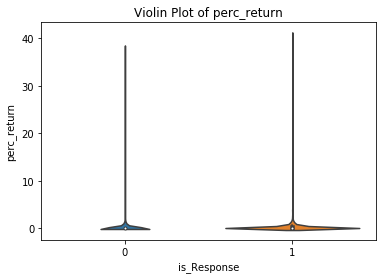

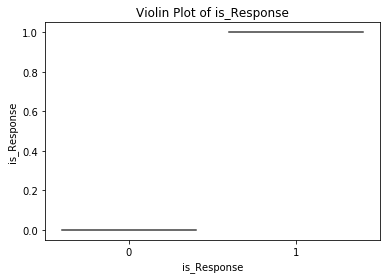

In [ ]:
for x in df:
    fig, ax= plt.subplots()
    sns.violinplot(x='is_Response', y=x, data=df, size=6)
    ax.set_title('Violin Plot of '+x)
    

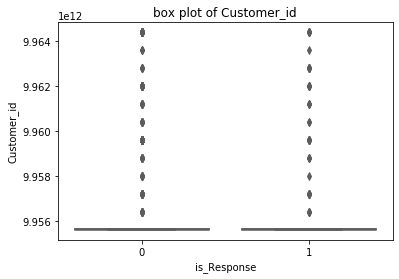

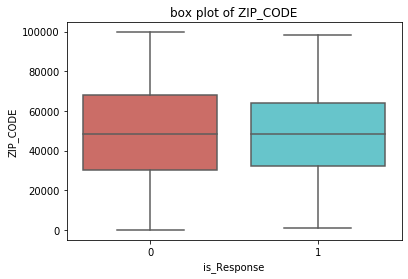

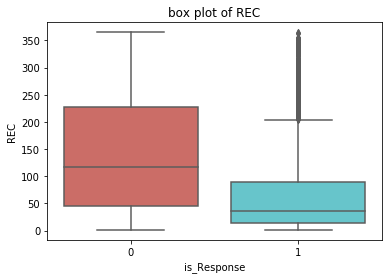

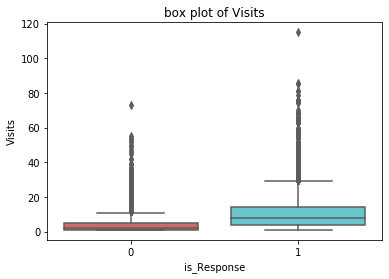

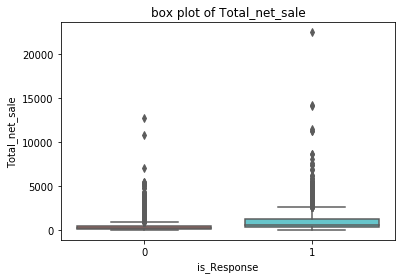

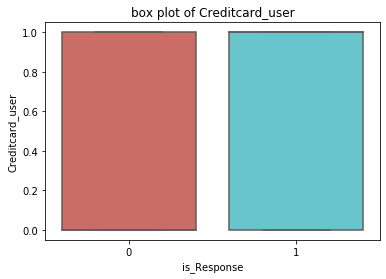

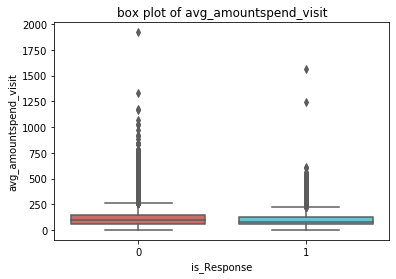

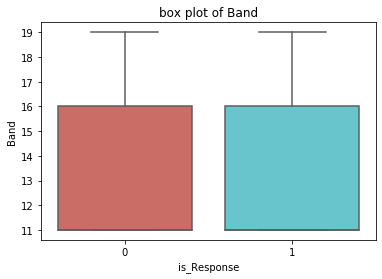

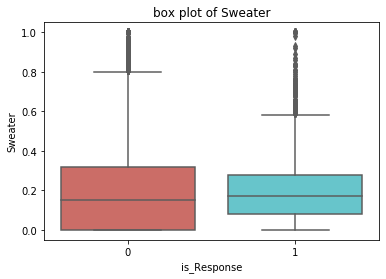

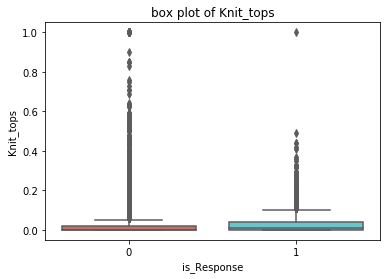

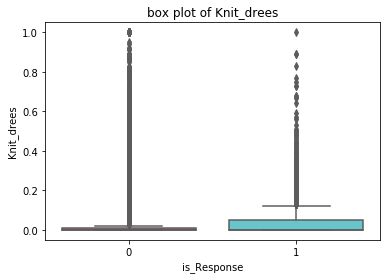

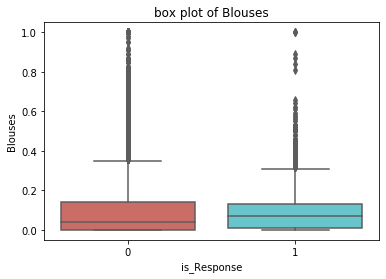

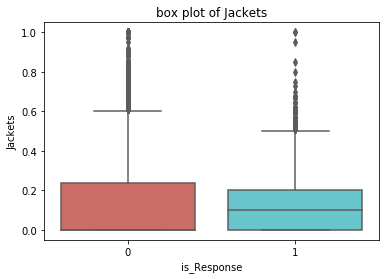

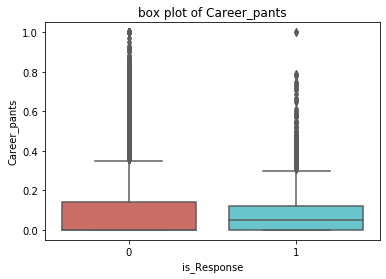

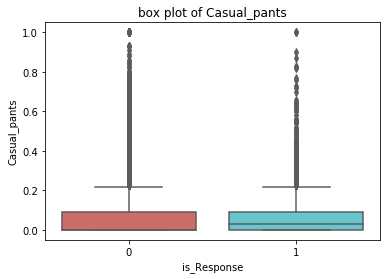

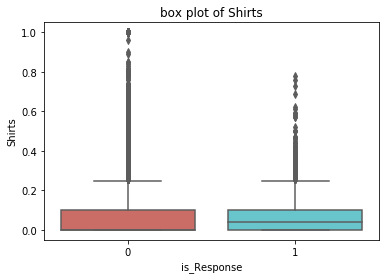

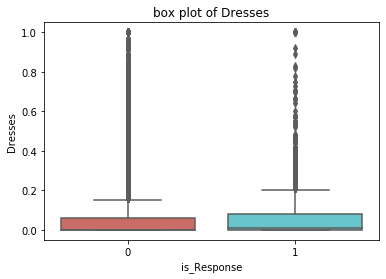

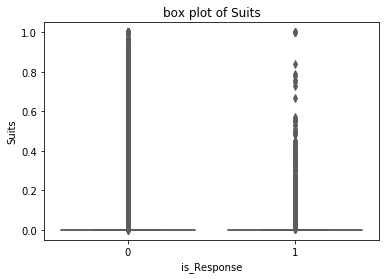

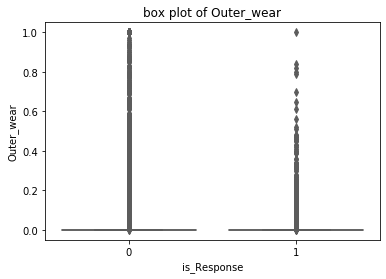

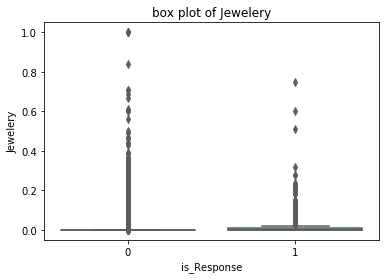

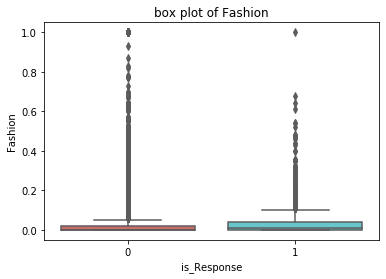

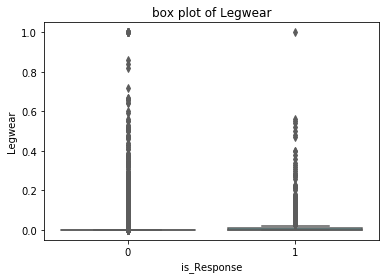

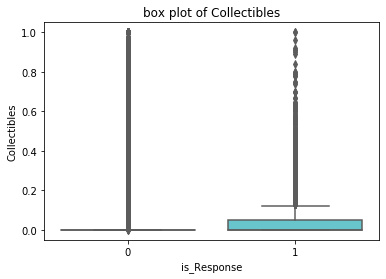

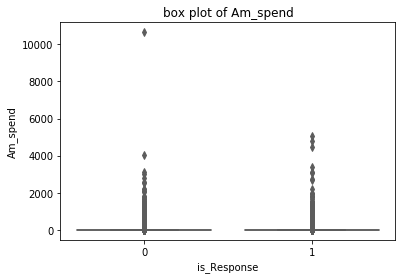

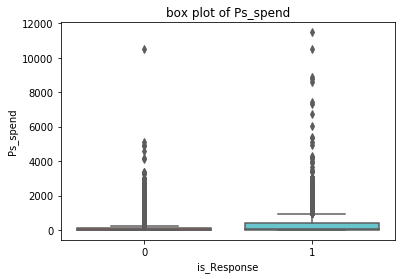

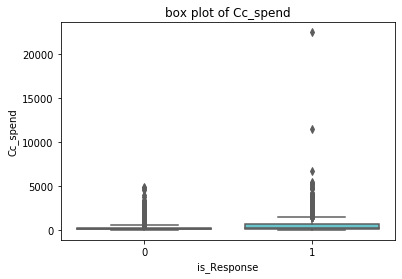

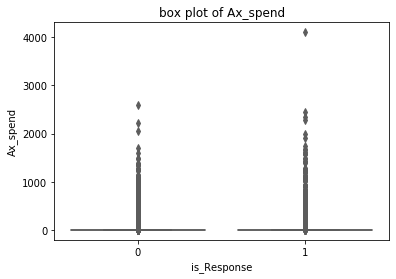

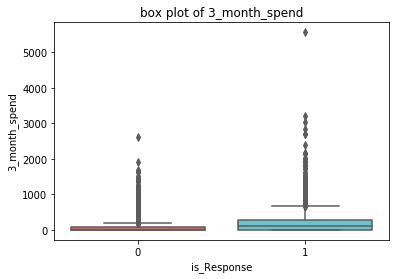

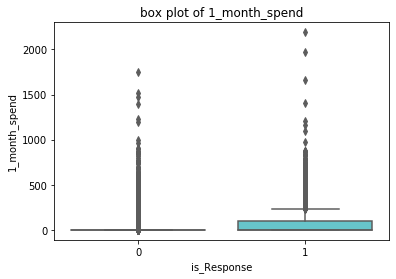

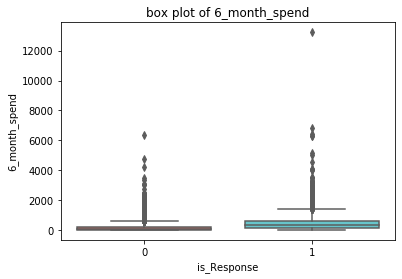

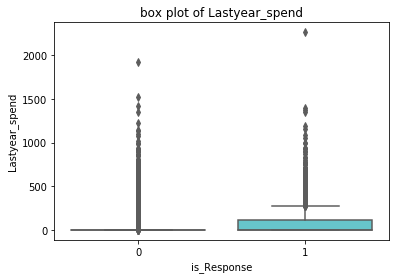

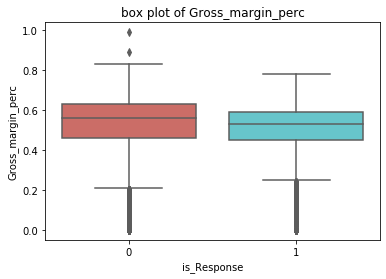

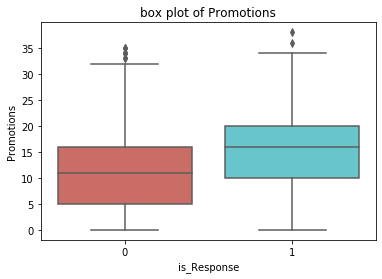

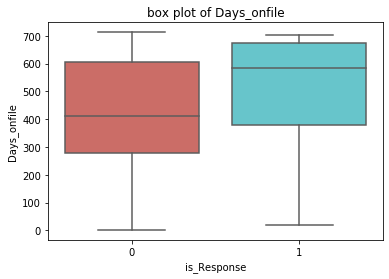

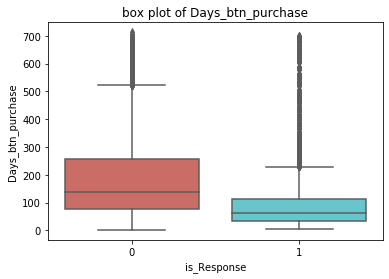

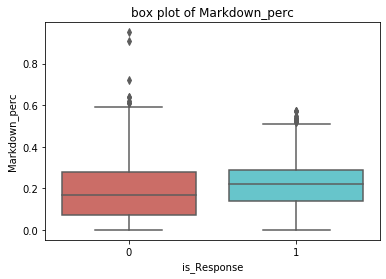

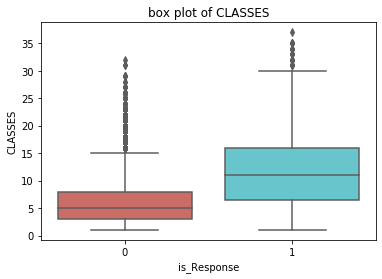

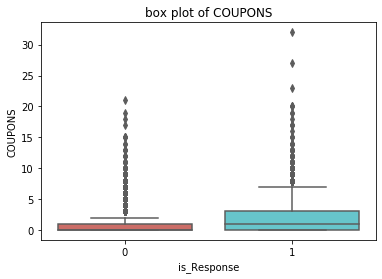

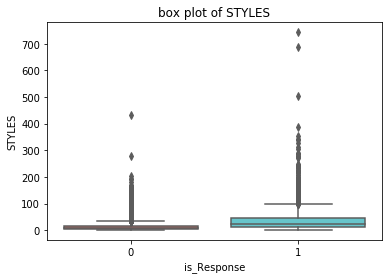

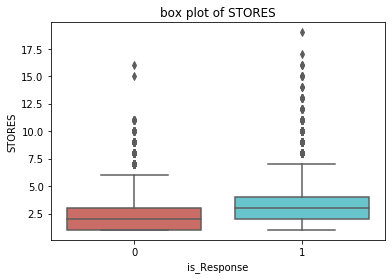

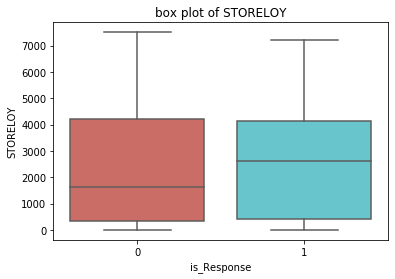

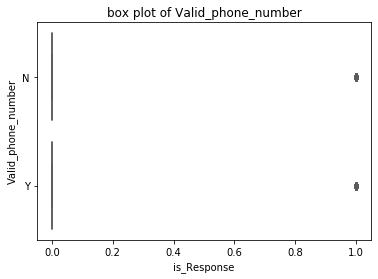

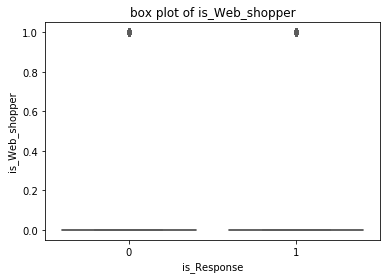

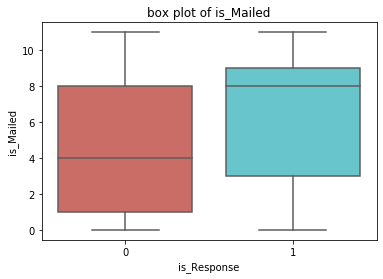

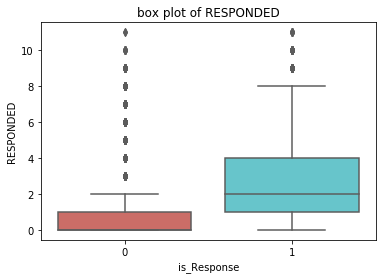

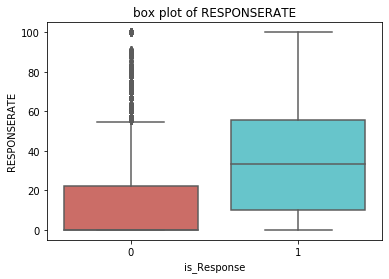

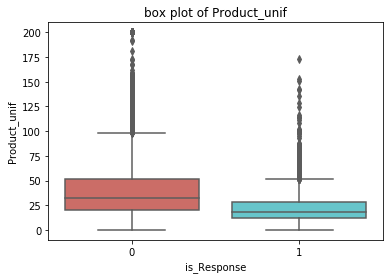

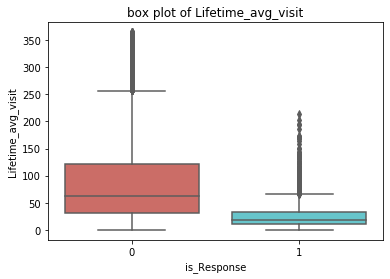

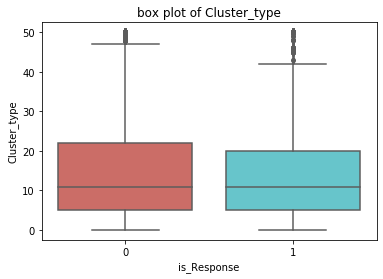

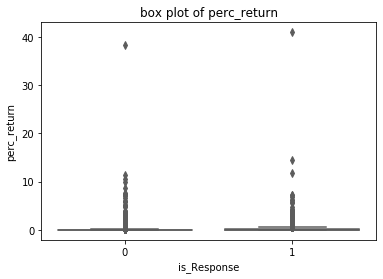

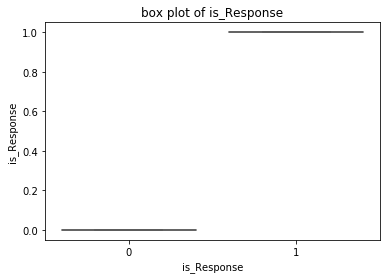

In [ ]:
# report outliers using boxplot
for x in df:
    sns.boxplot(x='is_Response',y=x,palette='hls',data=df)
    plt.title("box plot of "+x)
    plt.show()

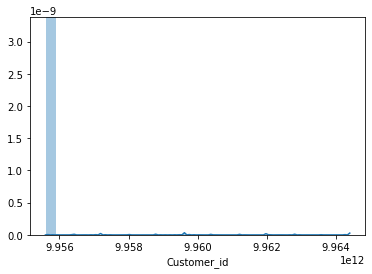

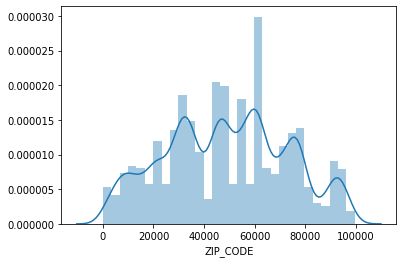

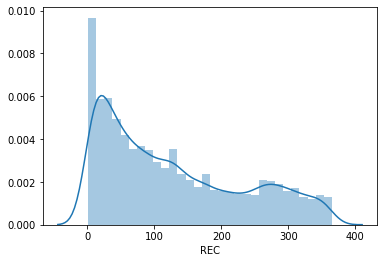

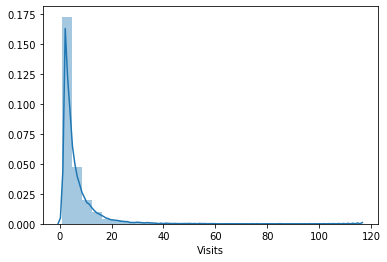

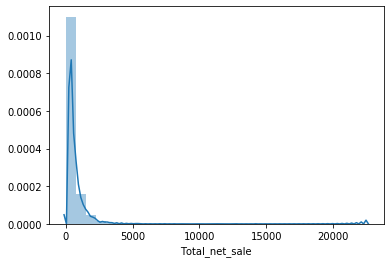

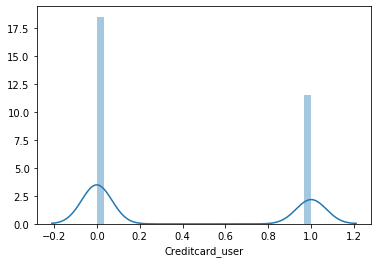

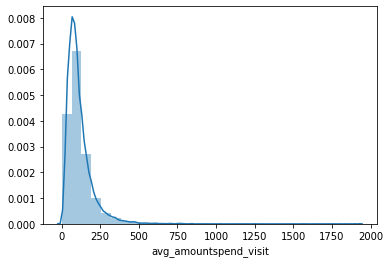

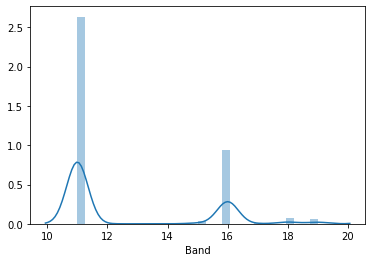

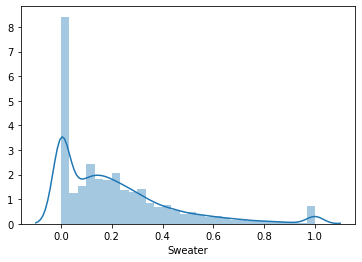

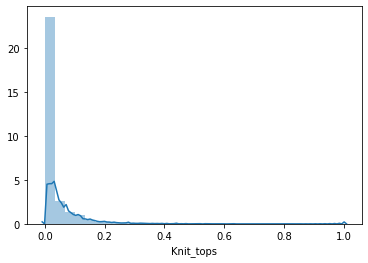

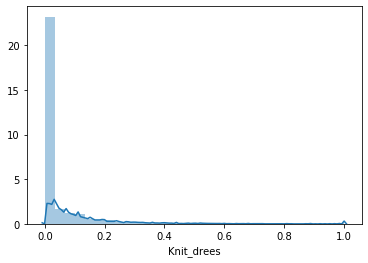

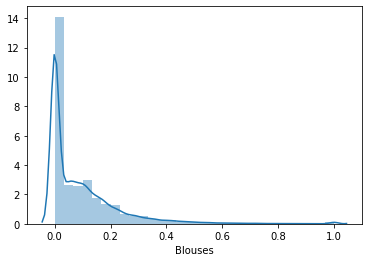

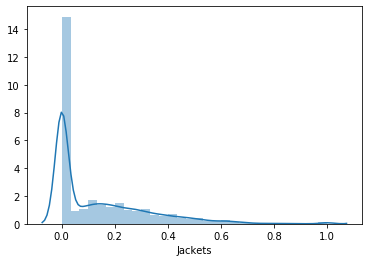

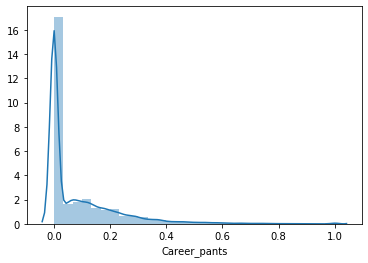

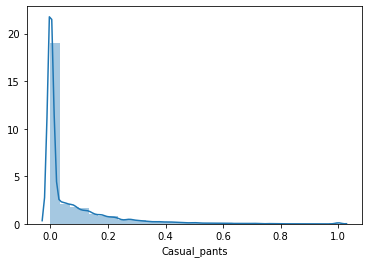

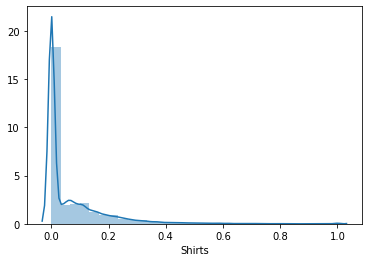

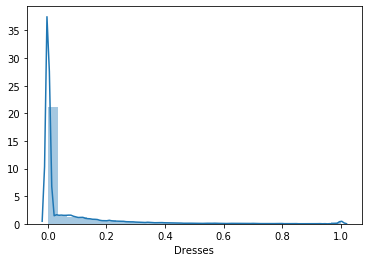

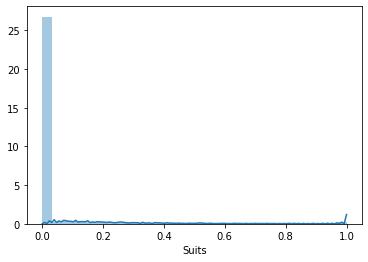

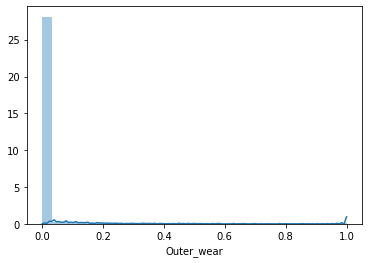

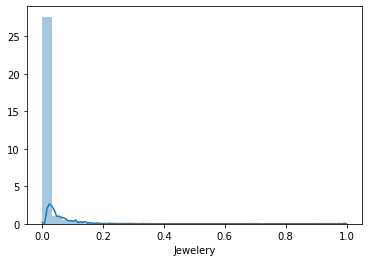

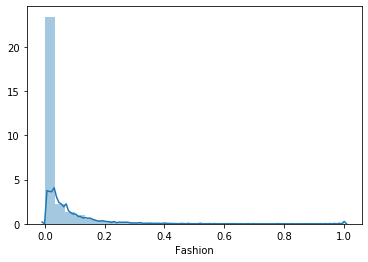

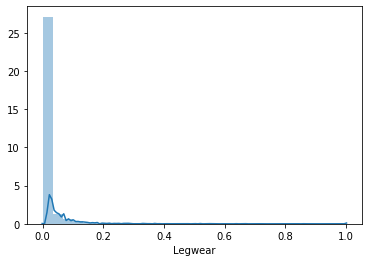

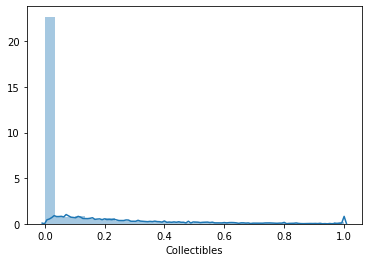

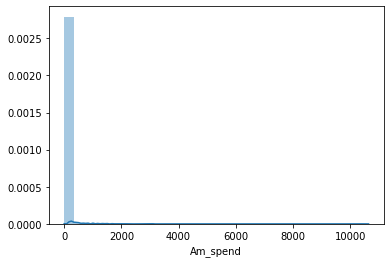

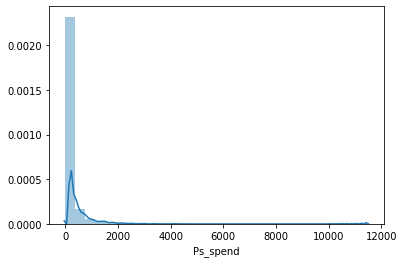

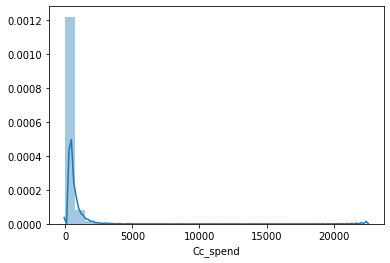

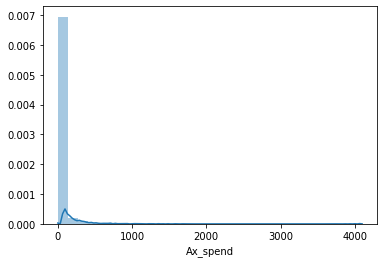

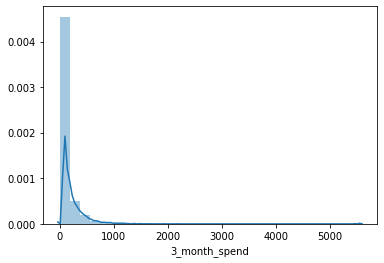

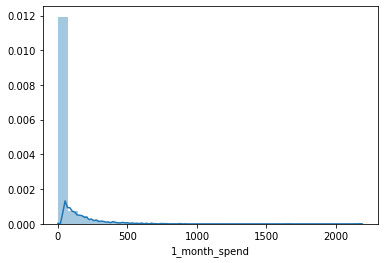

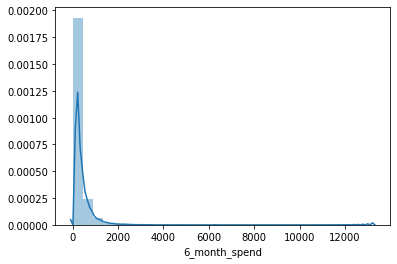

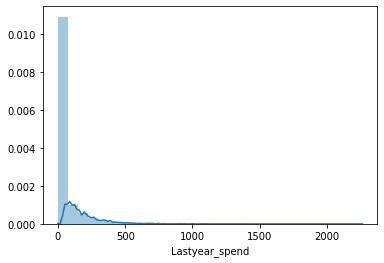

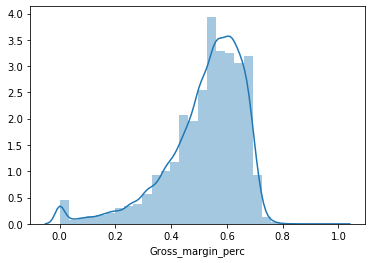

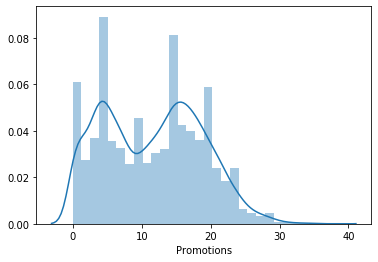

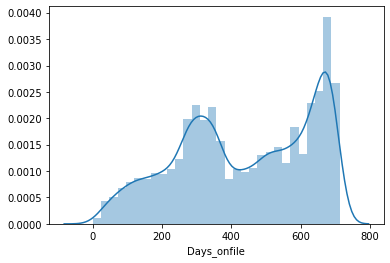

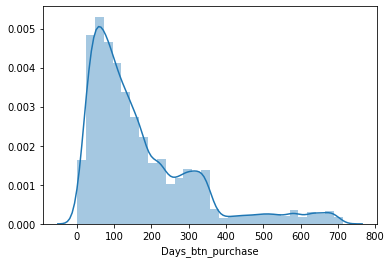

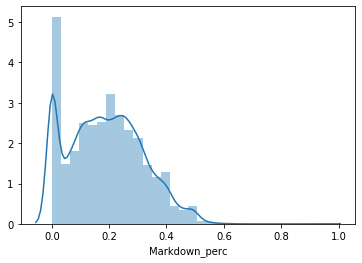

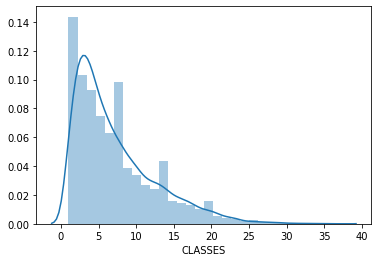

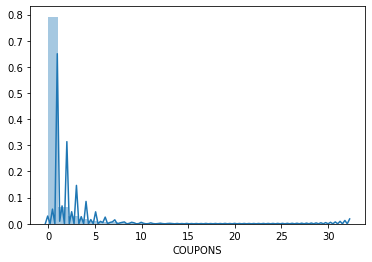

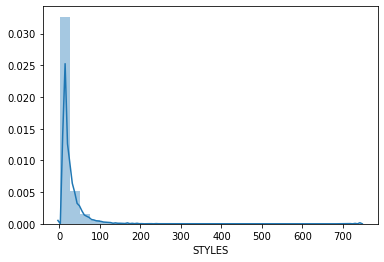

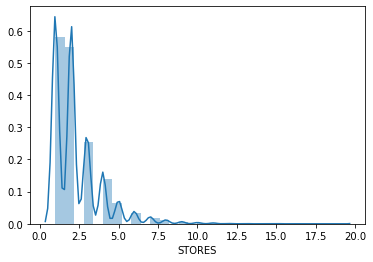

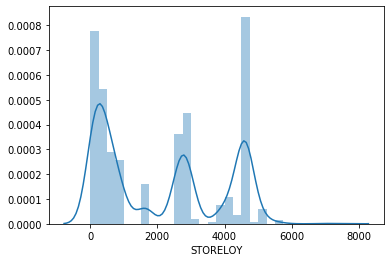

TypeError: unsupported operand type(s) for /: 'str' and 'int'

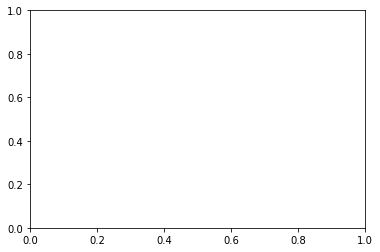

In [ ]:
# histogram of predictors to see data is normal or not 
for x in df:
    sns.distplot(df[x],bins=30,kde=True,)
    plt.show()

#above description most of the numerical variables is right skewed

[Text(0, 0.5, 'Percent')]

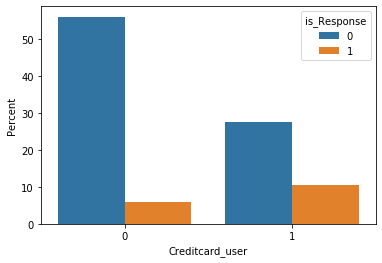

In [ ]:
#credit card user response to promotion last year 
ax = sns.barplot(x="Creditcard_user", y="Creditcard_user", hue="is_Response", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

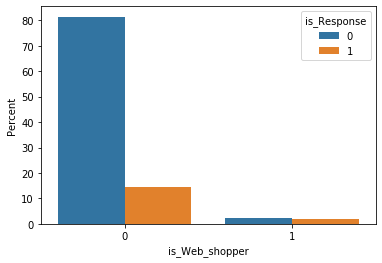

In [ ]:
#web shopper response to promotion last year
ax = sns.barplot(x="is_Web_shopper", y="is_Web_shopper", hue="is_Response", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

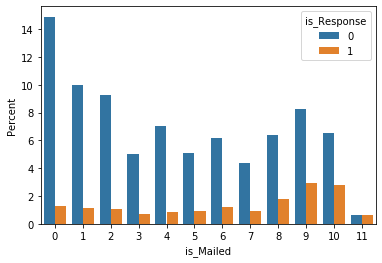

In [ ]:
mailing promotion response
ax = sns.barplot(x="is_Mailed", y="is_Mailed", hue="is_Response", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

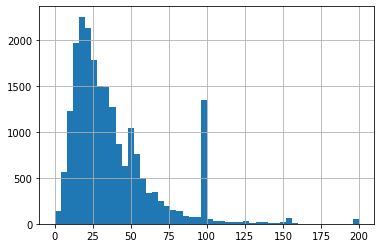

In [ ]:
#product uniformity, a variable that takes large values for customers who
#purchase only a few different classes of clothes (e.g., blouses, legwear, pants) and
#small values for customers who purchase many different classes of clothes. Later we
#shall see that high product uniformity is associated with low probability of responding
#to the promotion.
#applying tranformation with most customers having a relatively

#low product uniformity measure, while fewer customers have larger values. The cus-
#tomers with large values for product uniformity tend to buy only one or two classes of clothes.
df['Product_unif'].hist(bins=50)

In [ ]:
#relation with response

rel=df[['is_Response','Visits','CLASSES','COUPONS','Cc_spend','Ps_spend','perc_return','Ax_spend','avg_amountspend_visit'
       ,'Total_net_sale','STORELOY','STORES','Creditcard_user','is_Mailed','is_Web_shopper','spend2_3','spend4_5_6','1_month_spend'
       ,'RESPONDED']].corr()

is_Response    Visits   CLASSES   COUPONS  Cc_spend  \
is_Response               1.000000  0.402325  0.368663  0.304172  0.233259   
Visits                    0.402325  1.000000  0.775404  0.677224  0.506950   
CLASSES                   0.368663  0.775404  1.000000  0.635207  0.545599   
COUPONS                   0.304172  0.677224  0.635207  1.000000  0.532425   
Cc_spend                  0.233259  0.506950  0.545599  0.532425  1.000000   
Ps_spend                  0.207431  0.485134  0.480083  0.496648  0.041756   
perc_return               0.075669  0.160893  0.099197  0.067243  0.004063   
Ax_spend                  0.118502  0.267387  0.298369  0.199517  0.063821   
avg_amountspend_visit    -0.063063 -0.180251  0.066850  0.018653  0.221229   
Total_net_sale            0.322051  0.726655  0.759249  0.734038  0.723453   
STORELOY                  0.033071  0.050805  0.074522  0.032426 -0.062141   
STORES                    0.299772  0.641690  0.620167  0.470607  0.259743   
Creditcard_user           0.238324  0.358684  0.465821  0.436614  0.255637   
is_Mailed                 0.205927  0.411718  0.481793  0.351774  0.296675   
is_Web_shopper            0.157506  0.206679  0.186604  0.195723  0.148325   
spend2_3                  0.230827  0.449992  0.464895  0.440585  0.441035   
spend4_5_6                0.265207  0.574205  0.597158  0.632772  0.591317   
1_month_spend             0.200415  0.366608  0.400887  0.399094  0.382033   
RESPONDED                 0.347508  0.759806  0.741844  0.686612  0.490170   

                       Ps_spend  perc_return  Ax_spend  avg_amountspend_visit  \
is_Response            0.207431     0.075669  0.118502              -0.063063   
Visits                 0.485134     0.160893  0.267387              -0.180251   
CLASSES                0.480083     0.099197  0.298369               0.066850   
COUPONS                0.496648     0.067243  0.199517               0.018653   
Cc_spend               0.041756     0.004063  0.063821               0.221229   
Ps_spend               1.000000     0.009204  0.065654               0.106561   
perc_return            0.009204     1.000000 -0.001789              -0.152091   
Ax_spend               0.065654    -0.001789  1.000000              -0.006840   
avg_amountspend_visit  0.106561    -0.152091 -0.006840               1.000000   
Total_net_sale         0.652818     0.007204  0.266472               0.229967   
STORELOY               0.071895    -0.001029  0.119800              -0.013647   
STORES                 0.403513     0.115175  0.322769              -0.123088   
Creditcard_user        0.228930     0.057627  0.141272               0.066054   
is_Mailed              0.264477     0.065215  0.065526              -0.002144   
is_Web_shopper         0.122401     0.046827  0.046879              -0.005021   
spend2_3               0.388096    -0.006080  0.175557               0.128554   
spend4_5_6             0.502738     0.014856  0.202512               0.180478   
1_month_spend          0.348596    -0.008085  0.166569               0.127326   
RESPONDED              0.464963     0.066447  0.172049              -0.084380   

                       Total_net_sale  STORELOY    STORES  Creditcard_user  \
is_Response                  0.322051  0.033071  0.299772         0.238324   
Visits                       0.726655  0.050805  0.641690         0.358684   
CLASSES                      0.759249  0.074522  0.620167         0.465821   
COUPONS                      0.734038  0.032426  0.470607         0.436614   
Cc_spend                     0.723453 -0.062141  0.259743         0.255637   
Ps_spend                     0.652818  0.071895  0.403513         0.228930   
perc_return                  0.007204 -0.001029  0.115175         0.057627   
Ax_spend                     0.266472  0.119800  0.322769         0.141272   
avg_amountspend_visit        0.229967 -0.013647 -0.123088         0.066054   
Total_net_sale               1.000000  0.040928  0.509873    

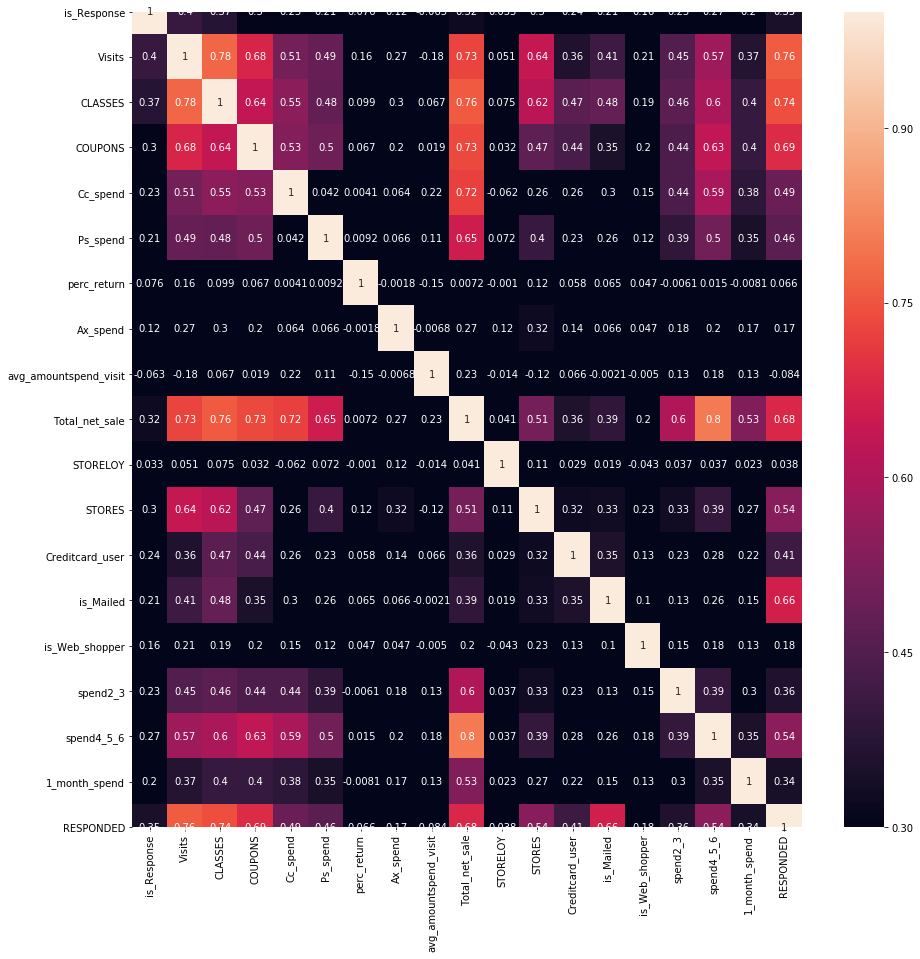

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(rel,vmin=0.3,annot=True)
rel

In [ ]:
df.drop(['Customer_id','ZIP_CODE'],axis=1,inplace=True)# drop unnecesry columns, these columns won't be useful in analysis and prediction

In [ ]:
from sklearn.preprocessing import LabelEncoder #convert categorical varible  string  to numerical
lb=LabelEncoder()
df['Valid_phone_number']=lb.fit_transform(df['Valid_phone_number'])


In [ ]:
df.head()

REC  Visits  Total_net_sale  Creditcard_user  avg_amountspend_visit  Band  \
0  208       2          368.46                0                 184.23    11   
1    6       4          258.00                1                  64.50    11   
2  327       2           77.00                0                  38.50    11   
3   66       8          846.06                1                 105.75    11   
4   49       1           87.44                0                  87.44    11   

   Sweater  Knit_tops  Knit_drees  Blouses  ...  is_Mailed  RESPONDED  \
0     0.18       0.00        0.00     0.30  ...          5          0   
1     0.26       0.16        0.00     0.00  ...          4          2   
2     1.00       0.00        0.00     0.00  ...          4          0   
3     0.38       0.00        0.05     0.06  ...          9          6   
4     0.20       0.20        0.00     0.00  ...          0          0   

   RESPONSERATE  Product_unif  Lifetime_avg_visit  Cluster_type  perc_return  \
0          0.00         31.81              111.00            10         0.00   
1         50.00         32.72               43.50            10         0.03   
2          0.00        100.00               68.60            16         0.00   
3         66.67         23.27               26.96            10         0.00   
4          0.00         28.52               24.50            20         0.00   

   is_Response  spend2_3  spend4_5_6  
0            0      0.00        0.00  
1            1     82.01      120.00  
2            0      0.00        0.00  
3            0    104.94      268.93  
4            0     87.44        0.00  

[5 rows x 49 columns]

Deriving new variables

In [ ]:
df['spend2_3']=df['3_month_spend']-df['1_month_spend']#Amount spent in previous months 2 and 3

In [ ]:
df['spend4_5_6']=df['6_month_spend']-df['3_month_spend']#Amount spent in previous months 4, 5, and 6

In [ ]:
df.drop(['6_month_spend','3_month_spend'],inplace=True,axis=1)

In [ ]:
df=df[df.spend2_3>=0]
df=df[df.spend4_5_6>=0]


In [ ]:
df.shape

(21522, 49)

In [ ]:
(df.spend4_5_6 <0).any()

False

# Transformations to Achieve Normality or Symmetry

In [ ]:
# separate train and test sets after feature selection 
x=df[['REC', 'Total_net_sale', 'avg_amountspend_visit', 'Cc_spend',
       'Days_onfile', 'Days_btn_purchase', 'STYLES', 'STORELOY',
       'Product_unif', 'Lifetime_avg_visit']]
X_train, X_test, y_train, y_test = train_test_split(
 x,
    df['is_Response'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape 

((17217, 10), (4305, 10))

In [ ]:
# separate train and test sets # after feature selection 
a=df[['Lifetime_avg_visit', 'Visits', 'Days_onfile', 'Casual_pants']]
X_train, X_test, y_train, y_test = train_test_split(
  a ,
    df['is_Response'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape 

((17217, 4), (4305, 4))

In [ ]:
# separate train and test sets after feature selection 
x=df[['REC', 'Total_net_sale', 'avg_amountspend_visit', 'Cc_spend',
       'Days_onfile', 'Days_btn_purchase', 'STYLES', 'STORELOY',
       'Product_unif', 'Lifetime_avg_visit']]
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(labels=['is_Response'],axis=1) ,
    df['is_Response'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
#check for zero values and show response of percentage of different clothes response 
for x in X_train:
     print((X_train[x]>0).value_counts()/17217*100)

True    100.0
Name: REC, dtype: float64
True    100.0
Name: Visits, dtype: float64
True    100.0
Name: Total_net_sale, dtype: float64
False    62.002672
True     37.997328
Name: Creditcard_user, dtype: float64
True    100.0
Name: avg_amountspend_visit, dtype: float64
True    100.0
Name: Band, dtype: float64
True     73.944357
False    26.055643
Name: Sweater, dtype: float64
False    63.14689
True     36.85311
Name: Knit_tops, dtype: float64
False    69.518499
True     30.481501
Name: Knit_drees, dtype: float64
True     58.488703
False    41.511297
Name: Blouses, dtype: float64
True     51.664053
False    48.335947
Name: Jackets, dtype: float64
False    54.039612
True     45.960388
Name: Career_pants, dtype: float64
False    57.629088
True     42.370912
Name: Casual_pants, dtype: float64
False    56.316431
True     43.683569
Name: Shirts, dtype: float64
False    66.823488
True     33.176512
Name: Dresses, dtype: float64
False    88.633328
True     11.366672
Name: Suits, dtype: float64
F

In [ ]:
numerical_features = df.select_dtypes(include = ["float64"]).columns
other_features = df.select_dtypes(exclude = ["float64"]).columns
train_num = df[numerical_features]
train_other = df[other_features]

In [ ]:
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log1plus transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

31 skewed numerical features to log1plus transform


In [ ]:
df=pd.concat([train_num,train_other],axis=1)

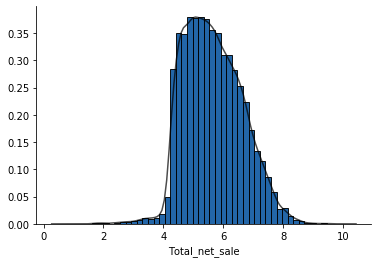

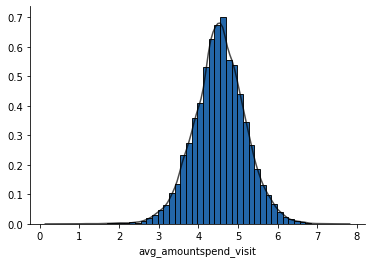

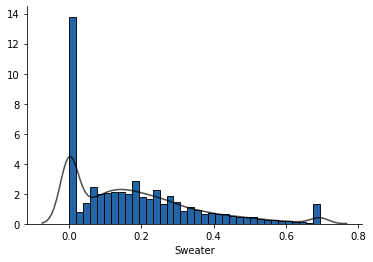

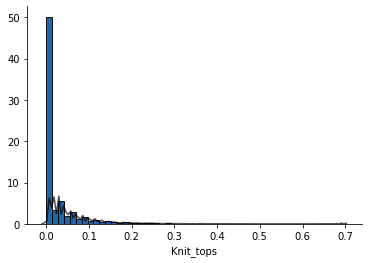

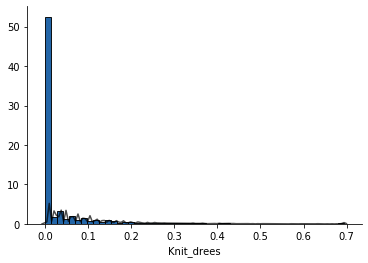

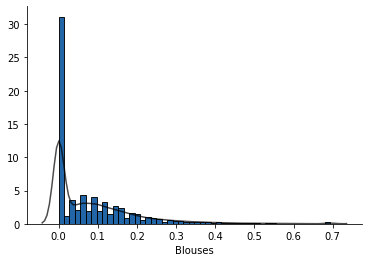

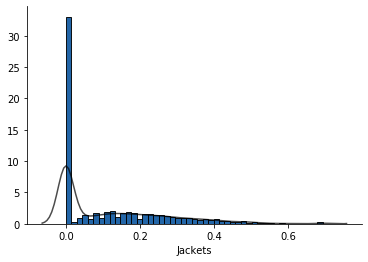

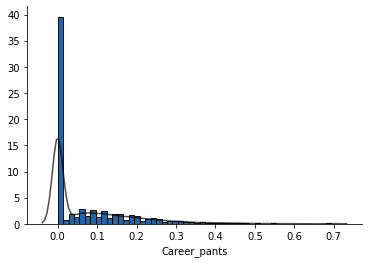

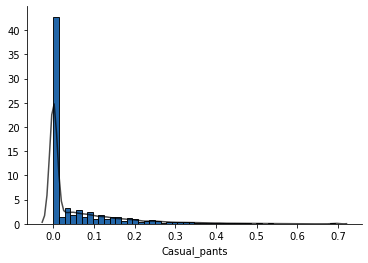

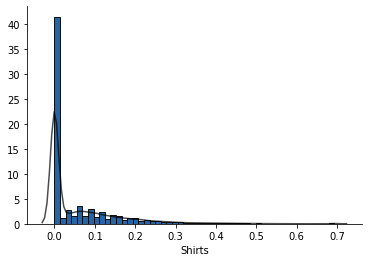

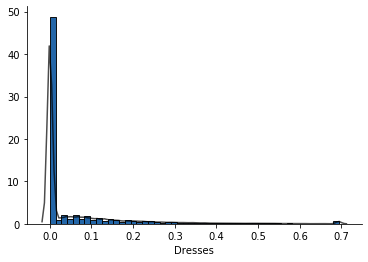

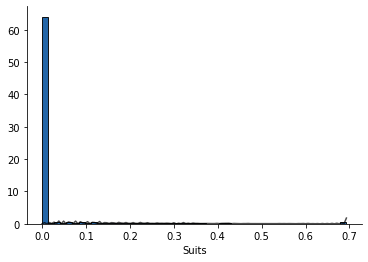

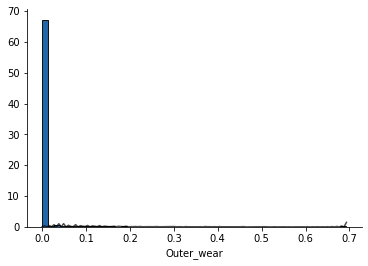

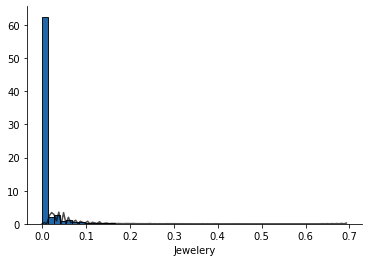

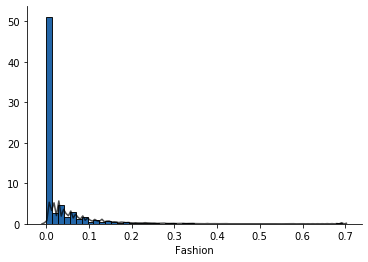

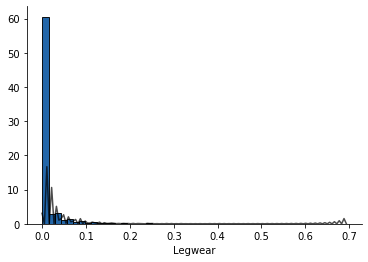

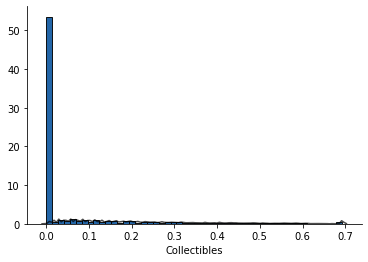

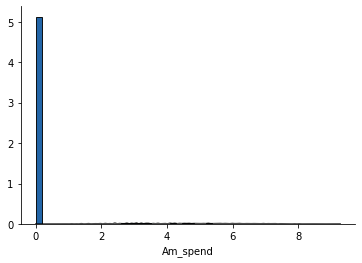

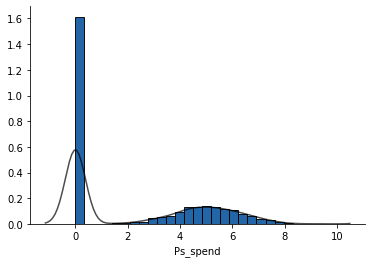

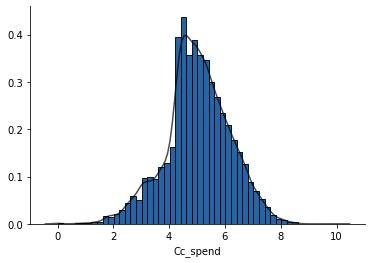

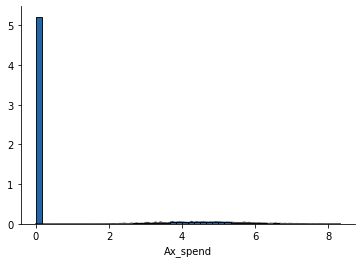

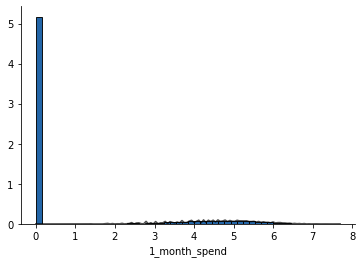

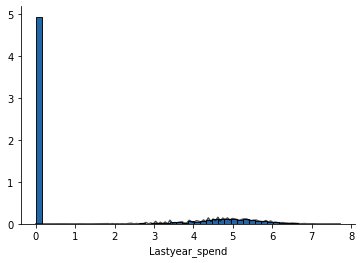

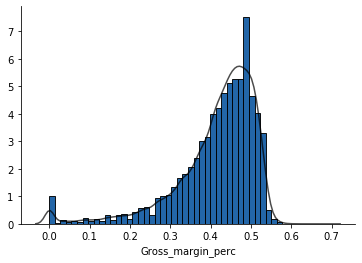

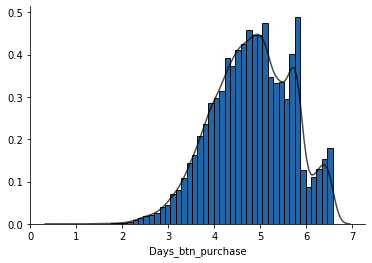

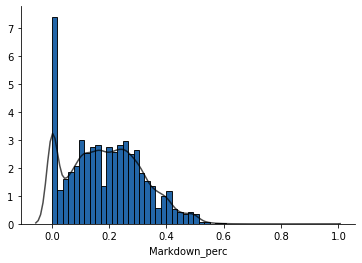

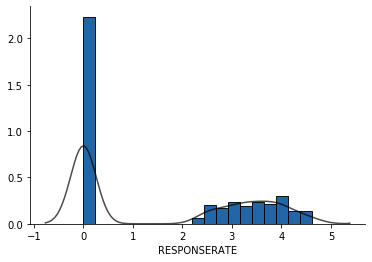

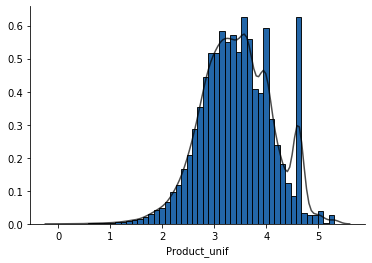

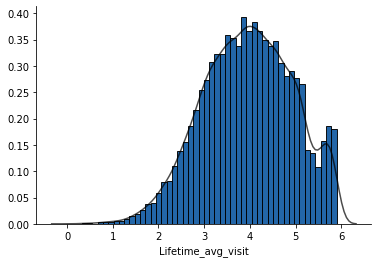

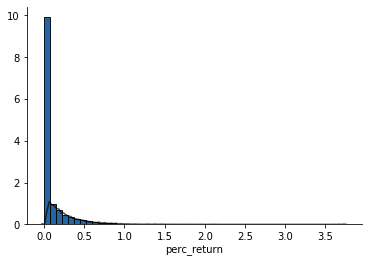

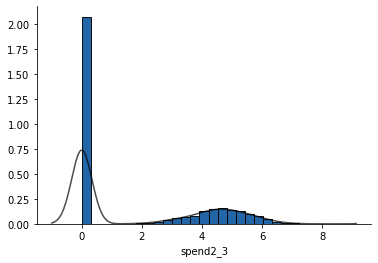

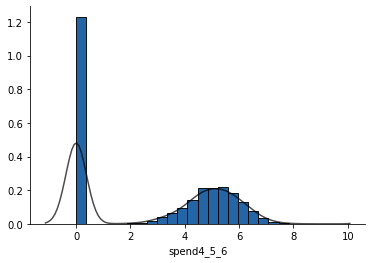

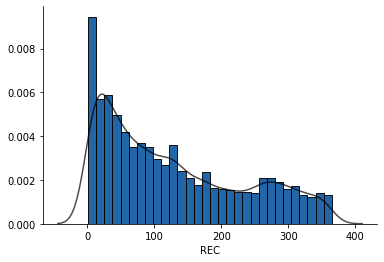

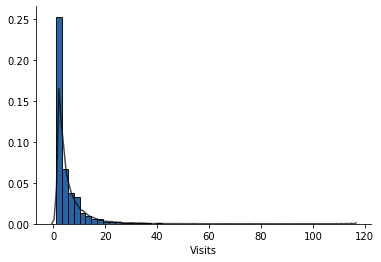

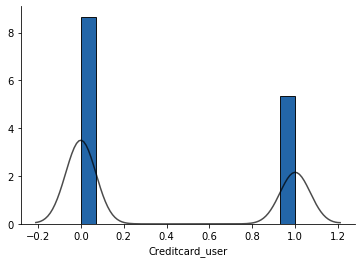

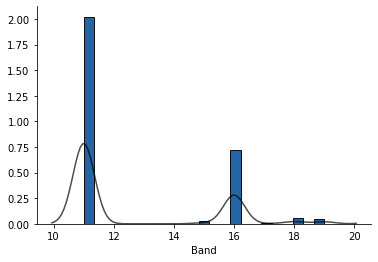

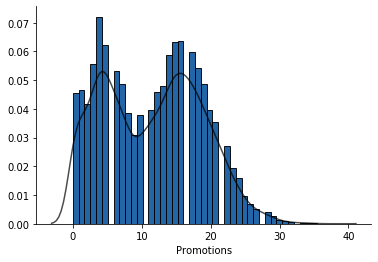

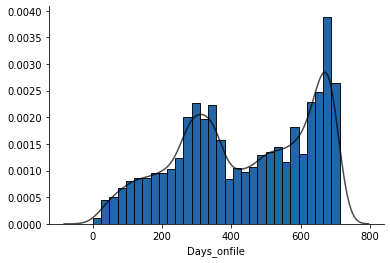

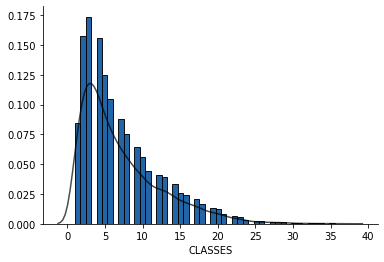

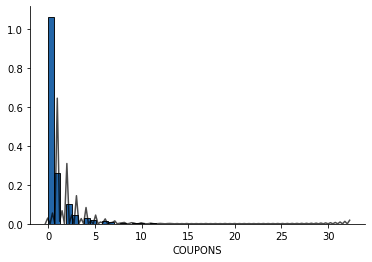

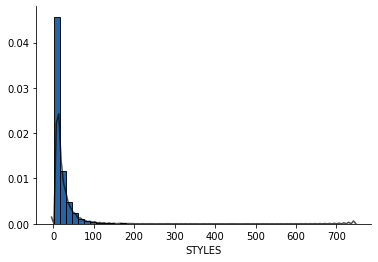

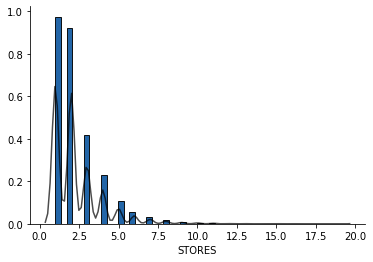

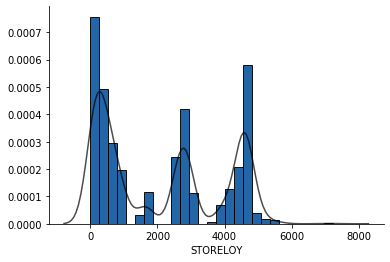

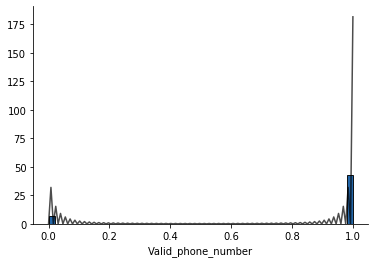

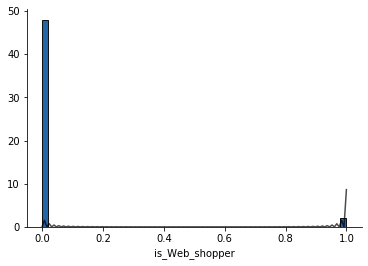

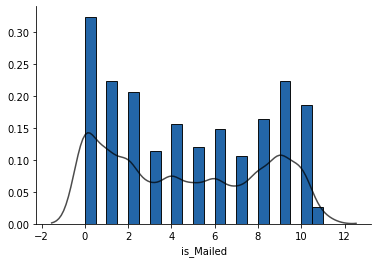

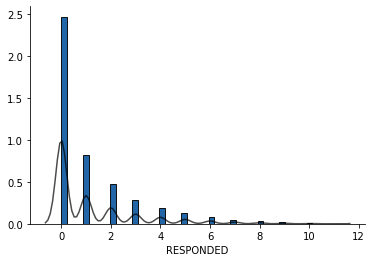

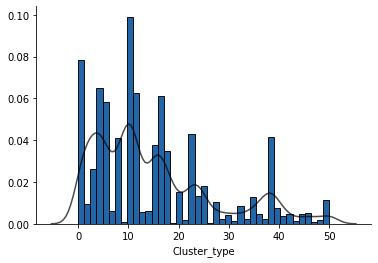

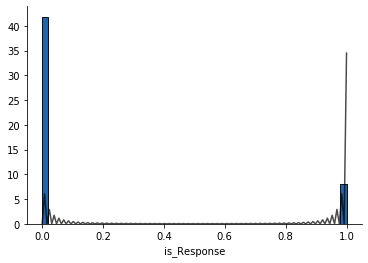

In [ ]:

def hist(series):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black', 'color': sns.color_palette('Blues')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    return fig, ax

for x in df.columns:
    hist(df[x])
    sns.despine()
    plt.show()

In [ ]:
df.shape

(21522, 49)

In [ ]:
df.columns

Index(['Total_net_sale', 'avg_amountspend_visit', 'Sweater', 'Knit_tops',
       'Knit_drees', 'Blouses', 'Jackets', 'Career_pants', 'Casual_pants',
       'Shirts', 'Dresses', 'Suits', 'Outer_wear', 'Jewelery', 'Fashion',
       'Legwear', 'Collectibles', 'Am_spend', 'Ps_spend', 'Cc_spend',
       'Ax_spend', '1_month_spend', 'Lastyear_spend', 'Gross_margin_perc',
       'Days_btn_purchase', 'Markdown_perc', 'RESPONSERATE', 'Product_unif',
       'Lifetime_avg_visit', 'perc_return', 'spend2_3', 'spend4_5_6', 'REC',
       'Visits', 'Creditcard_user', 'Band', 'Promotions', 'Days_onfile',
       'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'STORELOY',
       'Valid_phone_number', 'is_Web_shopper', 'is_Mailed', 'RESPONDED',
       'Cluster_type', 'is_Response'],
      dtype='object')

In [ ]:
df['spend4_5_6'].std()

2.620673362290653

In [ ]:

df['COUPONS'].std()

1.6519307393108211

In [ ]:
df.describe()

Total_net_sale  avg_amountspend_visit       Sweater     Knit_tops  \
count    21522.000000           21522.000000  21522.000000  21522.000000   
mean         5.658356               4.536149      0.178274      0.024987   
std          0.964309               0.653677      0.172955      0.057621   
min          0.688135               0.398776      0.000000      0.000000   
25%          4.912434               4.135007      0.000000      0.000000   
50%          5.570499               4.541218      0.148420      0.000000   
75%          6.340148               4.948689      0.270027      0.029559   
max         10.021826               7.560539      0.693147      0.693147   

         Knit_drees       Blouses       Jackets  Career_pants  Casual_pants  \
count  21522.000000  21522.000000  21522.000000  21522.000000  21522.000000   
mean       0.036155      0.083107      0.115973      0.075603      0.060813   
std        0.088544      0.110875      0.147280      0.114953      0.107685   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.048790      0.039221      0.000000      0.000000   
75%        0.019803      0.131028      0.207014      0.122218      0.086178   
max        0.693147      0.693147      0.693147      0.693147      0.693147   

             Shirts  ...       COUPONS        STYLES        STORES  \
count  21522.000000  ...  21522.000000  21522.000000  21522.000000   
mean       0.059211  ...      0.736363     17.017331      2.325388   
std        0.097363  ...      1.651931     24.502930      1.589314   
min        0.000000  ...      0.000000      1.000000      1.000000   
25%        0.000000  ...      0.000000      4.000000      1.000000   
50%        0.000000  ...      0.000000      9.000000      2.000000   
75%        0.095310  ...      1.000000     20.000000      3.000000   
max        0.693147  ...     32.000000    743.000000     19.000000   

           STORELOY  Valid_phone_number  is_Web_shopper     is_Mailed  \
count  21522.000000        21522.000000    21522.000000  21522.000000   
mean    2116.234272            0.858935        0.040795      4.656491   
std     1806.455637            0.348097        0.197821      3.545016   
min        3.000000            0.000000        0.000000      0.000000   
25%      337.000000            1.000000        0.000000      1.000000   
50%     1670.000000            1.000000        0.000000      4.000000   
75%     4177.000000            1.000000        0.000000      8.000000   
max     7504.000000            1.000000        1.000000     11.000000   

          RESPONDED  Cluster_type   is_Response  
count  21522.000000  21522.000000  21522.000000  
mean       1.178469     15.115092      0.163135  
std        1.817488     12.219071      0.369498  
min        0.000000      0.000000      0.000000  
25%        0.000000      5.000000      0.000000  
50%        0.000000     11.000000      0.000000  
75%        2.000000     22.000000      0.000000  
max       11.000000     50.000000      1.000000  

[8 rows x 49 columns]

In [ ]:
# separate train and test sets select all features 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['is_Response'], axis=1),
    df['is_Response'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape 

((17217, 48), (4305, 48))

# Standizing the data 

In [ ]:
mu=X_train.mean()
sigma=X_train.std()
X_train=(X_train-mu)/sigma
(X_train.mean()<0).value_counts()

False    28
True     20
dtype: int64

In [ ]:
X_train.shape

(17217, 48)

In [ ]:
X_train['COUPONS'].std()

1.0000000000000593

In [ ]:
X_train['spend4_5_6'].std()

0.9999999999999496

In [ ]:
corr=X_train[['Visits','Total_net_sale','avg_amountspend_visit']].corr()

Visits  Total_net_sale  avg_amountspend_visit
Visits                 1.000000        0.652103              -0.204719
Total_net_sale         0.652103        1.000000               0.397268
avg_amountspend_visit -0.204719        0.397268               1.000000

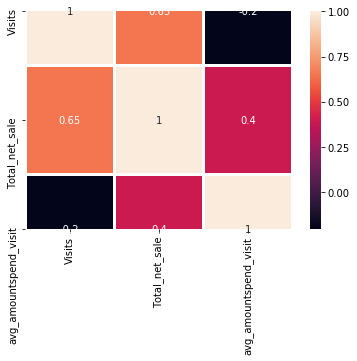

In [ ]:
# correlection between differnt predictors
sns.heatmap(corr,annot=True,linewidths=2)
corr

# Relationship Between the Predictors and the Response
Regression Plots
We look for plots which have a strong relationship between the response and the predictor. Probably list a few here and discuss their interpretation

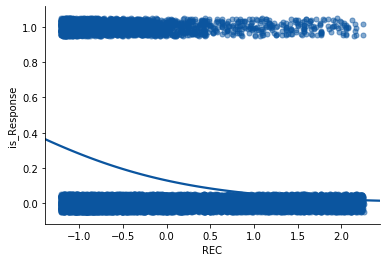

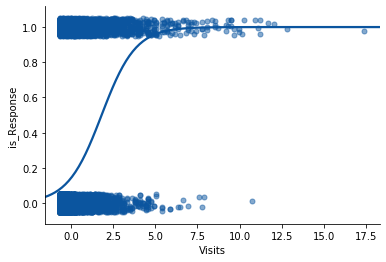

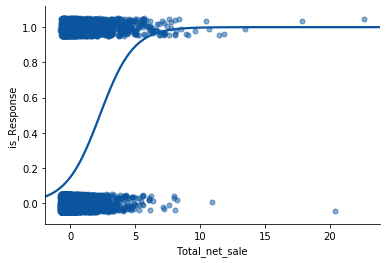

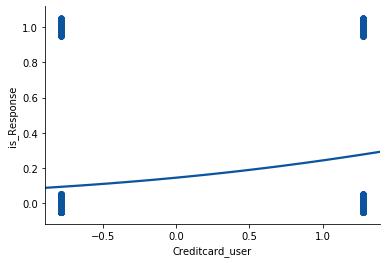

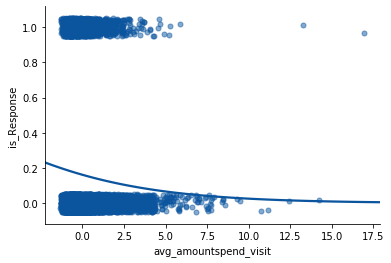

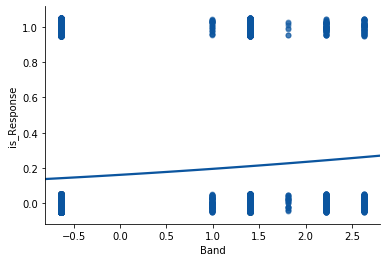

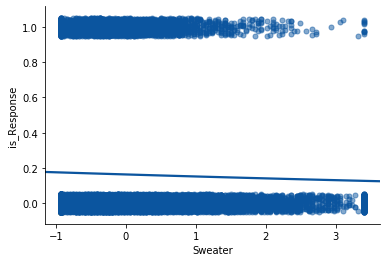

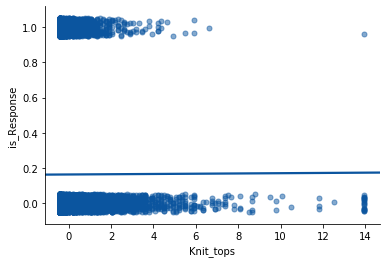

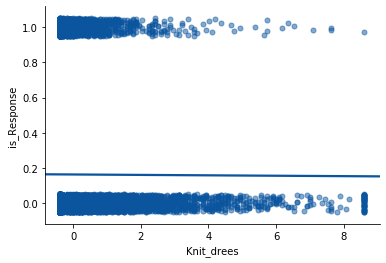

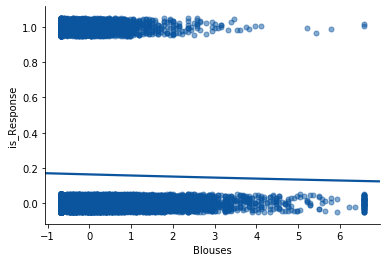

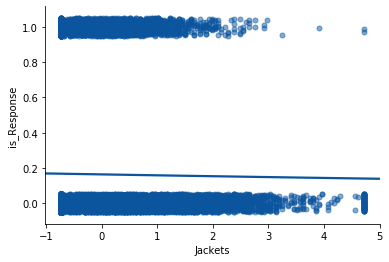

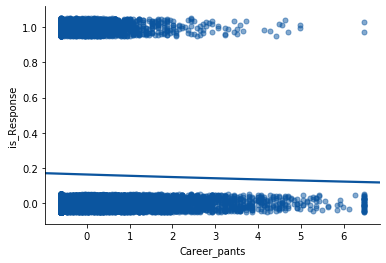

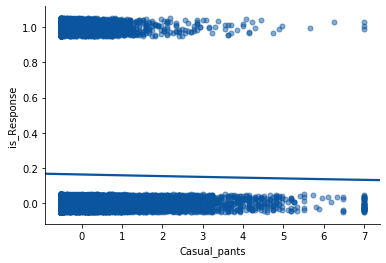

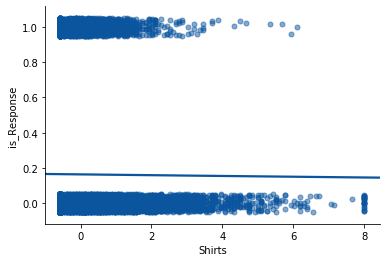

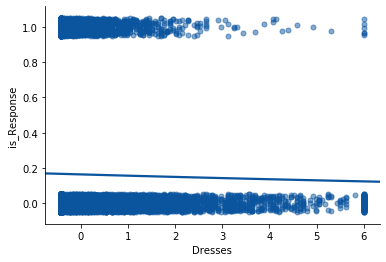

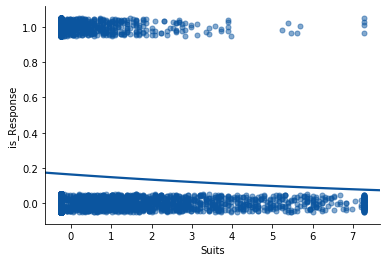

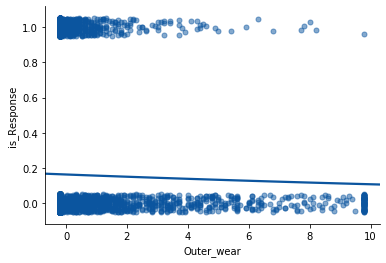

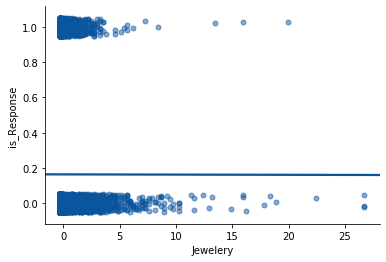

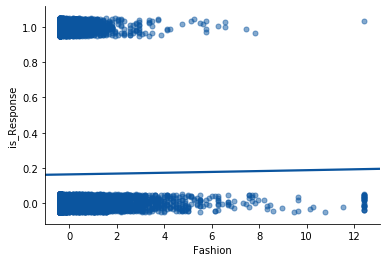

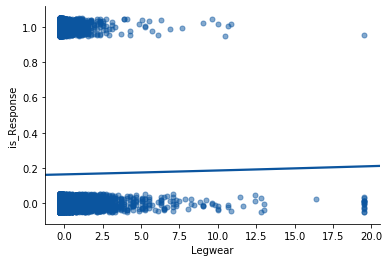

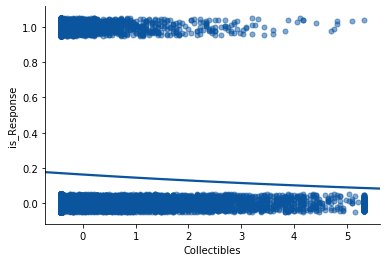

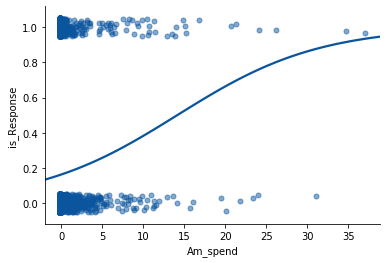

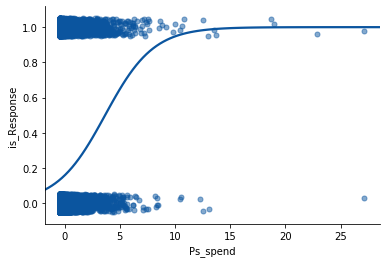

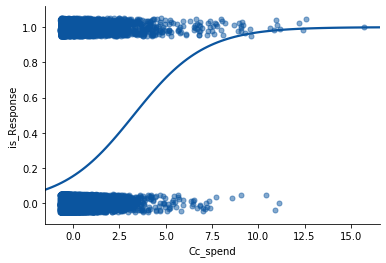

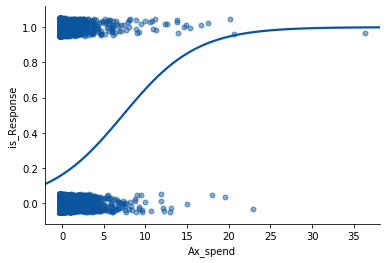

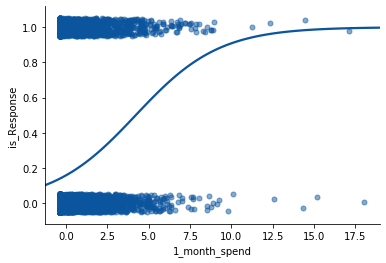

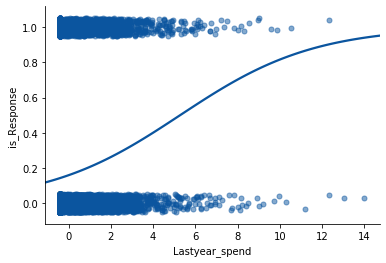

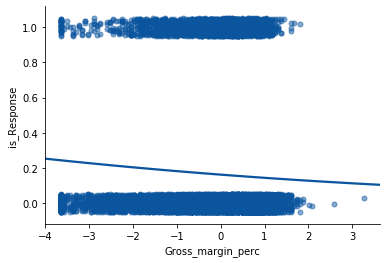

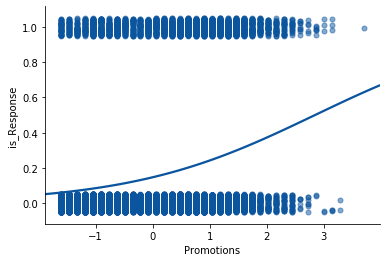

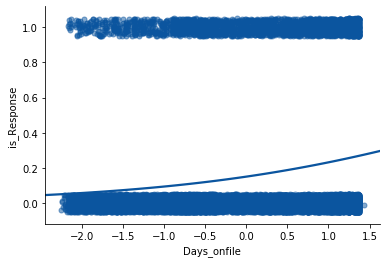

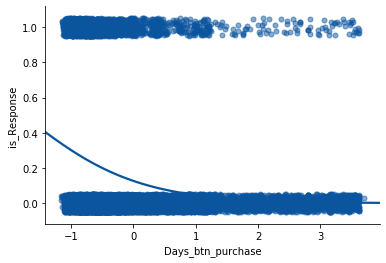

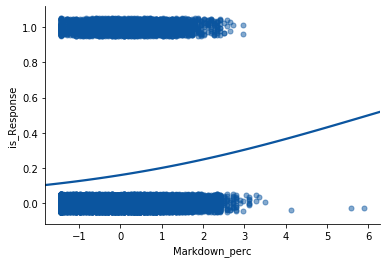

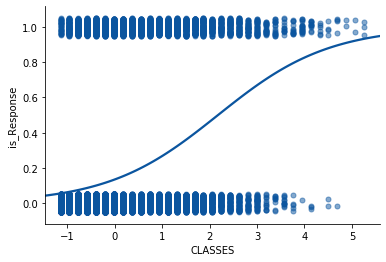

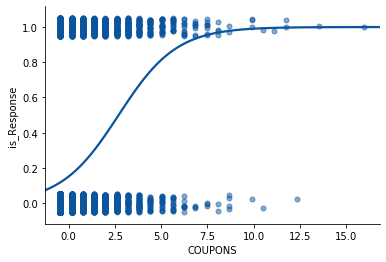

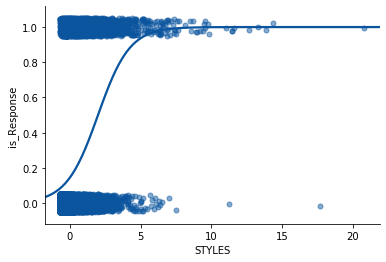

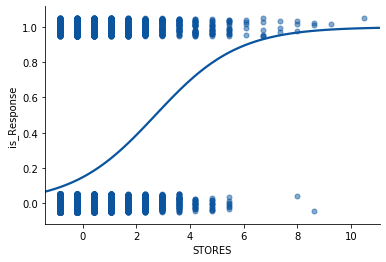

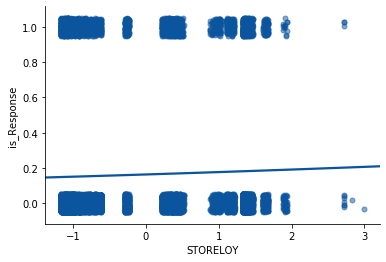

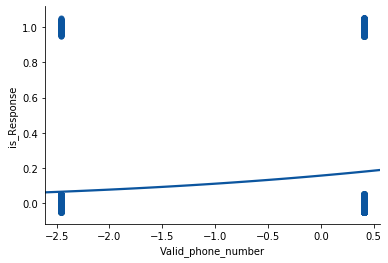

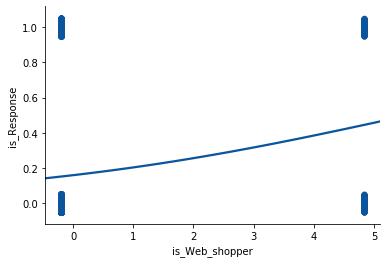

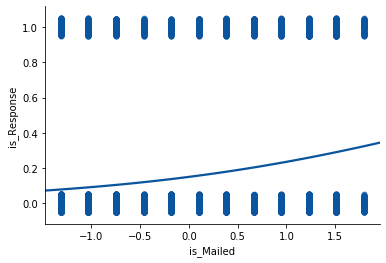

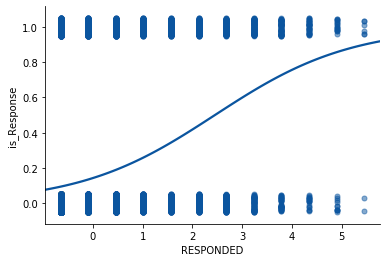

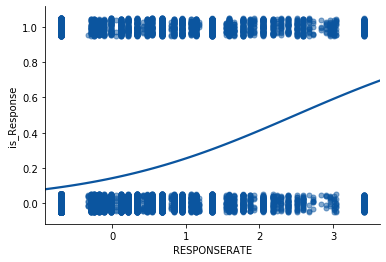

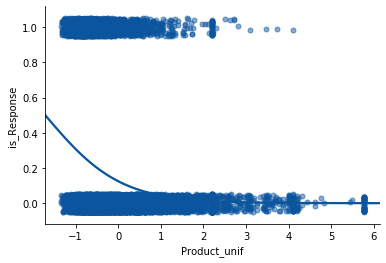

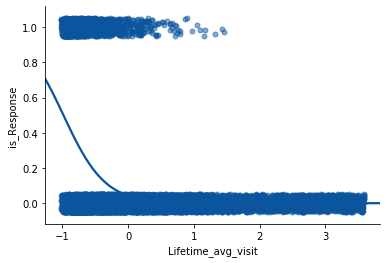

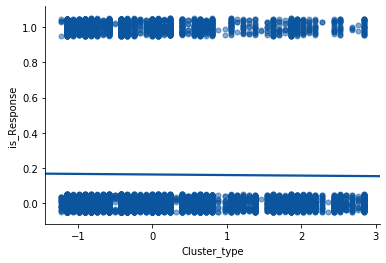

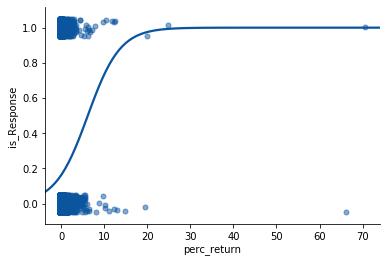

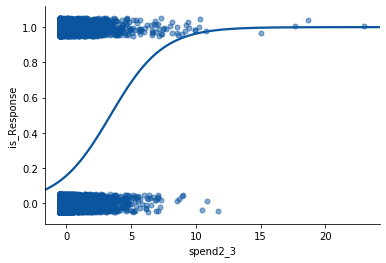

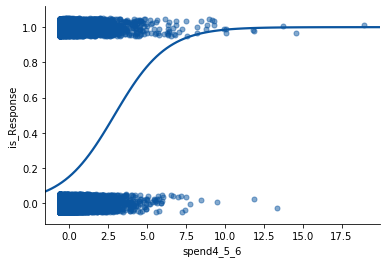

In [ ]:

for predictor in X_train.columns:
    fig, ax= plt.subplots()
    sns.regplot(X_train[predictor], y_train, color=sns.color_palette('Blues')[-1], ci=None, logistic=True, y_jitter=0.05, 
            scatter_kws={'s': 25, 'color': sns.color_palette('Blues')[-1], 'alpha': .5})
    sns.despine()
    plt.show()
    fig.savefig(predictor)

# Class Imbalance

# CLASS IMBALANCE PERFORMED AFTER FEATURE SELECTION with feature selection and without feature selection 

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (17217, 48) (17217,)
Upsampled shape: (28818, 48) (28818,)
SMOTE sample shape: (28818, 48) (28818,)
Downsampled shape: (5616, 48) (5616,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 

cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.4136829472420377
The best F1 Score for Upsampled data:
0.7761986667932264
The best F1 Score for SMOTE data:
0.7869607791274593
The best F1 Score for Downsampled data:
0.7731563547580208


0.5095404641287606

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))
print("confusion matirix")
print(confusion_matrix(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.49
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3602
           1       0.10      0.03      0.04       703

   micro avg       0.80      0.80      0.80      4305
   macro avg       0.47      0.49      0.47      4305
weighted avg       0.71      0.80      0.75      4305

confusion matirix
[[3428  174]
 [ 684   19]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')

rf_result.mean()

0.8614018950476048

In [ ]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print("confusion matirix")
print(confusion_matrix(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.61
              precision    recall  f1-score   support

           0       0.89      0.56      0.69      3602
           1       0.23      0.65      0.34       703

   micro avg       0.58      0.58      0.58      4305
   macro avg       0.56      0.61      0.51      4305
weighted avg       0.78      0.58      0.63      4305

confusion matirix
[[2035 1567]
 [ 245  458]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.8153264201456869

In [ ]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))
print("confusion matirix")
print(confusion_matrix(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.36
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      3602
           1       0.06      0.13      0.08       703

   micro avg       0.52      0.52      0.52      4305
   macro avg       0.42      0.36      0.38      4305
weighted avg       0.66      0.52      0.58      4305

confusion matirix
[[2151 1451]
 [ 615   88]]


In [ ]:
rf.predict_proba(X_test)

array([[0.4, 0.6],
       [0.5, 0.5],
       [0.6, 0.4],
       ...,
       [0.5, 0.5],
       [0.6, 0.4],
       [0.5, 0.5]])

# BELOW ROC GRAPH is without feature selection and with feature selection ROC graph is show in report 

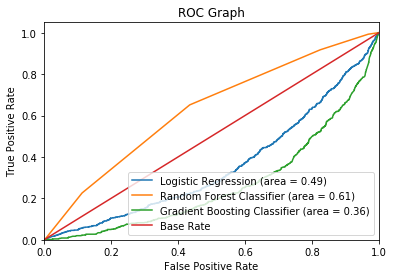

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# FESTURE SELECTION

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import RFE

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score

In [ ]:
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   25.8s finished

[2020-03-29 17:21:17] Features: 1/10 -- score: 0.7753616047781153[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   21.6s finished

[2020-03-29 17:21:38] Features: 2/10 -- score: 0.7841895912632952[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   22.2s finished

[2020-03-29 17:22:01] Features: 3/10 -- score: 0.7837538326295354[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['Visits', 'Creditcard_user', 'Band', 'Outer_wear', 'Am_spend',
       'Days_btn_purchase', 'COUPONS', 'Valid_phone_number', 'is_Web_shopper',
       'Lifetime_avg_visit'],
      dtype='object')

In [ ]:
def run_randomForests(X_train, X_test, y_train_sm, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    pred1 = rf.predict(X_test)
    MAE=np.mean(np.absolute(y_test-pred[:,1]))
    print("MAE:",MAE)
    MSE=np.mean((y_test-pred[:,1])**2)
    print("MSE:",MSE)
    RMSE=np.sqrt(MSE)
    print("RMSE:",RMSE)
    
    

In [ ]:
run_randomForests(X_train[selected_feat].fillna(0),
                  X_test[selected_feat].fillna(0),
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8320189888046783
Test set
Random Forests roc-auc: 0.7650540674810817
MAE: 0.28218481718394317
MSE: 0.1288081732179307
RMSE: 0.35889855560858797


# random forest

In [ ]:
sel_ = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=10)
sel_.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

10

In [ ]:
selected_feat

Index(['REC', 'Total_net_sale', 'avg_amountspend_visit', 'Cc_spend',
       'Days_onfile', 'Days_btn_purchase', 'STYLES', 'STORELOY',
       'Product_unif', 'Lifetime_avg_visit'],
      dtype='object')

In [ ]:

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)

    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
   
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
run_randomForests(X_train[selected_feat].fillna(0),X_test[selected_feat].fillna(0),y_train,y_test)

Train set
Random Forests roc-auc: 0.8369658416243884
Test set
Random Forests roc-auc: 0.5891331510943424


In [ ]:
X_test.shape

(4305, 48)